In [ ]:
# Load library:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import pickle

# Load Training Data

In [ ]:
griddef = gs.GridDef(griddef="100 0 1 \n100 0 1 \n1 0.5 1")
griddef

In [ ]:
row = gs.DataFile('10addcoord1.out')['X']
col = gs.DataFile('10addcoord1.out')['Y']

In [ ]:
with open('X_train_Azimuth', 'rb') as handle:
    X_train = pickle.load(handle)

In [ ]:
with open('Y_train_Azimuth', 'rb') as handle:
    Y_train = pickle.load(handle)

# Data Set up

In [ ]:
# Split the data into random train and test subsets and shuffle the data
from sklearn.model_selection import train_test_split

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_train,Y_train, test_size=0.2, random_state=73073,shuffle=True)

In [ ]:
X2_train = X2_train.reshape(87120, 100, 100,1)
X2_test  = X2_test.reshape(21780, 100, 100,1)

In [ ]:
# Summary of the data

In [ ]:
print ("number of training examples = " + str(X2_train.shape[0]))
print ("number of test examples = " + str(X2_test.shape[0]))
print ("X_train shape: " + str(X2_train.shape))
print ("Y_train shape: " + str(y2_train.shape))
print ("X_test shape: " + str(X2_test.shape))
print ("Y_test shape: " + str(y2_test.shape))

# CNN-A : Predict the Azimuth

In [ ]:
# Design, Train and Test the CNN

In [ ]:
kernel_sizes = [2,3,4]
conv_layers = [4,6]
Dropouts = [0,0.25,0.5]
Namelist=[]
for kernel_size in kernel_sizes:
    for conv_layer in conv_layers:
        for Dropout in Dropouts:
            NAME = "{}-conv-{}x{}-kernel_size-{}-Dropout".format(conv_layer, kernel_size,kernel_size, int(Dropout*100))
            print(NAME)
            Namelist.append(NAME)

In [ ]:
for kernel_size in kernel_sizes:
    for conv_layer in conv_layers:
        for Dropout in Dropouts:
            NAME = "{}-conv-{}x{}-kernel_size-{}-Dropout".format(conv_layer, kernel_size,kernel_size, int(Dropout*100))
            print(NAME)
            
            model = tf.keras.Sequential()
    
            model.add(layers.Conv2D(8, kernel_size=(kernel_size,kernel_size), strides=1, input_shape=[100,100,1], padding="same"))
            model.add(layers.ReLU())
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
            
            layer_size = 16
            for l in range(conv_layer-2):
                model.add(layers.Conv2D(layer_size, kernel_size=(kernel_size,kernel_size), strides=(1,1), padding = "same"))
                model.add(layers.ReLU())
                model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
                layer_size = layer_size*2
    
            model.add(layers.Conv2D(8, kernel_size=(3,3), strides=(1,1), padding = "same"))
            model.add(layers.ReLU())
            
            model.add(layers.Dropout(0.25))
            model.add(layers.Flatten())
            
            model.add(layers.Dense(13,activation = 'sigmoid'))
    
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
            model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=optimizer)

            
            history = model.fit(X2_train, y2_train,epochs=100, verbose=1,validation_data=(X2_test, y2_test))

            acc = history.history['accuracy']
            val_acc = history.history['val_accuracy']
            loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochs = range(len(acc))

            
            datafl = np.array([epochs, acc,val_acc,loss,val_loss]).T
            header='\n'.join(["Output", "5","epochs","acc","val_acc","loss","val_loss"])
            np.savetxt('Saved_Results/'+str(conv_layer)+'conv_'+str(kernel_size)+'x'+str(kernel_size)+'kernel_size_'+str(int(Dropout*100))+'Dropout.out', datafl, delimiter=" ",comments='',header=header)

            
            plt.subplot(1,1,1)
            plt.plot(loss)
            plt.plot(val_loss)
            plt.title('Loss function of CNN Model')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['Train', 'Test'], loc='upper right',fontsize=12)
            plt.ylim(0.002,0.006)
            plt.grid()
            plt.tight_layout()
            plt.savefig('Saved_Images/'+str(conv_layer)+'conv_'+str(kernel_size)+'x'+str(kernel_size)+'kernel_size_'+str(int(Dropout*100))+'Dropout.png', dpi=300, bbox_inches='tight')
            plt.show()
            model.save('Saved_models/Model_'+str(conv_layer)+'conv_'+str(kernel_size)+'x'+str(kernel_size)+'kernel_size_'+str(int(Dropout*100))+'Dropout.h5')
            

In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
CNN_Major = load_model('Sensitivity Analysis Plots/Azimuth/Saved_models/Model_4conv_2x2kernel_size_25Dropout.h5')
# summarize model.
CNN_Major.summary()

# CNN-1 : Predict the key variogram model parameters (Range in the major direction - Anisotropy ratio - Nugget effect )

In [ ]:
with open('X_train_Variogram', 'rb') as handle:
    X_train = pickle.load(handle)

In [ ]:
with open('Y_train_Variogram', 'rb') as handle:
    Y_train = pickle.load(handle)

In [ ]:
kernel_sizes = [5]
conv_layers = [4]
Dropouts = [0]
Namelist=[]
for kernel_size in kernel_sizes:
    for conv_layer in conv_layers:
        for Dropout in Dropouts:
            NAME = "{}-conv-{}x{}-kernel_size-{}-Dropout".format(conv_layer, kernel_size,kernel_size, int(Dropout*100))
            print(NAME)
            Namelist.append(NAME)

In [22]:
for i in Namelist:
    imgdir = (('logs/{}').format(i))
    gs.mkdir(imgdir)

2-conv-2x2-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 26s 304us/sample - loss: 0.0069 - accuracy: 0.1006 - val_loss: 0.0057 - val_accuracy: 0.1050
Epoch 2/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0056 - accuracy: 0.1031 - val_loss: 0.0054 - val_accuracy: 0.1007
Epoch 3/100
87120/87120 [==============================] - 21s 241us/sample - loss: 0.0054 - accuracy: 0.0981 - val_loss: 0.0052 - val_accuracy: 0.1023
Epoch 4/100
87120/87120 [==============================] - 21s 242us/sample - loss: 0.0050 - accuracy: 0.1019 - val_loss: 0.0047 - val_accuracy: 0.1048
Epoch 5/100
87120/87120 [==============================] - 21s 243us/sample - loss: 0.0045 - accuracy: 0.1037 - val_loss: 0.0043 - val_accuracy: 0.1040
Epoch 6/100
87120/87120 [==============================] - 21s 243us/sample - loss: 0.0043 - accuracy: 0.1038 - val_loss: 0.0042 - val_accuracy: 0.1024
Epoch

87120/87120 [==============================] - 22s 252us/sample - loss: 0.0037 - accuracy: 0.0949 - val_loss: 0.0037 - val_accuracy: 0.0960
Epoch 55/100
87120/87120 [==============================] - 22s 255us/sample - loss: 0.0037 - accuracy: 0.0959 - val_loss: 0.0037 - val_accuracy: 0.0978
Epoch 56/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0037 - accuracy: 0.0962 - val_loss: 0.0037 - val_accuracy: 0.0963
Epoch 57/100
87120/87120 [==============================] - 22s 253us/sample - loss: 0.0037 - accuracy: 0.0970 - val_loss: 0.0037 - val_accuracy: 0.0974
Epoch 58/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0037 - accuracy: 0.0965 - val_loss: 0.0037 - val_accuracy: 0.0966
Epoch 59/100
87120/87120 [==============================] - 22s 258us/sample - loss: 0.0037 - accuracy: 0.0964 - val_loss: 0.0037 - val_accuracy: 0.0950
Epoch 60/100
87120/87120 [==============================] - 22s 254us/sample - loss: 0.0037 - a

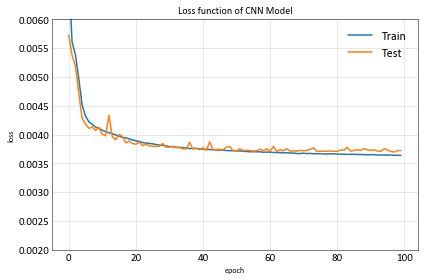

2-conv-2x2-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 23s 261us/sample - loss: 0.0074 - accuracy: 0.1027 - val_loss: 0.0054 - val_accuracy: 0.1050
Epoch 2/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0054 - accuracy: 0.1066 - val_loss: 0.0052 - val_accuracy: 0.1043
Epoch 3/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0051 - accuracy: 0.1082 - val_loss: 0.0049 - val_accuracy: 0.1047
Epoch 4/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0048 - accuracy: 0.1079 - val_loss: 0.0046 - val_accuracy: 0.1043
Epoch 5/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0045 - accuracy: 0.1079 - val_loss: 0.0044 - val_accuracy: 0.1038
Epoch 6/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0044 - accuracy: 0.1072 - val_loss: 0.0043 - val_accuracy: 0.1046
Epoc

87120/87120 [==============================] - 22s 251us/sample - loss: 0.0038 - accuracy: 0.1004 - val_loss: 0.0038 - val_accuracy: 0.1028
Epoch 55/100
87120/87120 [==============================] - 22s 247us/sample - loss: 0.0038 - accuracy: 0.0997 - val_loss: 0.0038 - val_accuracy: 0.0994
Epoch 56/100
87120/87120 [==============================] - 22s 253us/sample - loss: 0.0038 - accuracy: 0.0998 - val_loss: 0.0038 - val_accuracy: 0.0993
Epoch 57/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0038 - accuracy: 0.1003 - val_loss: 0.0038 - val_accuracy: 0.1028
Epoch 58/100
87120/87120 [==============================] - 22s 247us/sample - loss: 0.0038 - accuracy: 0.1007 - val_loss: 0.0038 - val_accuracy: 0.1010
Epoch 59/100
87120/87120 [==============================] - 22s 249us/sample - loss: 0.0038 - accuracy: 0.0999 - val_loss: 0.0038 - val_accuracy: 0.1000
Epoch 60/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0038 - a

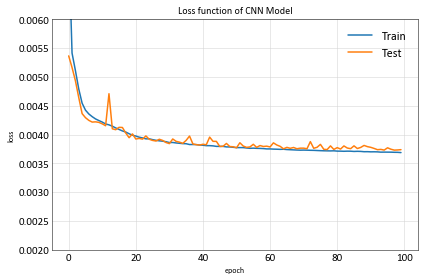

2-conv-2x2-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 23s 263us/sample - loss: 0.0066 - accuracy: 0.1017 - val_loss: 0.0052 - val_accuracy: 0.1047
Epoch 2/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0052 - accuracy: 0.1075 - val_loss: 0.0050 - val_accuracy: 0.1047
Epoch 3/100
87120/87120 [==============================] - 22s 257us/sample - loss: 0.0051 - accuracy: 0.1078 - val_loss: 0.0050 - val_accuracy: 0.1047
Epoch 4/100
87120/87120 [==============================] - 22s 255us/sample - loss: 0.0050 - accuracy: 0.1079 - val_loss: 0.0049 - val_accuracy: 0.1047
Epoch 5/100
87120/87120 [==============================] - 22s 254us/sample - loss: 0.0049 - accuracy: 0.1079 - val_loss: 0.0048 - val_accuracy: 0.1047
Epoch 6/100
87120/87120 [==============================] - 22s 257us/sample - loss: 0.0047 - accuracy: 0.1079 - val_loss: 0.0047 - val_accuracy: 0.1047
Epoc

87120/87120 [==============================] - 23s 258us/sample - loss: 0.0037 - accuracy: 0.1080 - val_loss: 0.0038 - val_accuracy: 0.1043
Epoch 55/100
87120/87120 [==============================] - 22s 256us/sample - loss: 0.0037 - accuracy: 0.1076 - val_loss: 0.0038 - val_accuracy: 0.1047
Epoch 56/100
87120/87120 [==============================] - 22s 253us/sample - loss: 0.0037 - accuracy: 0.1076 - val_loss: 0.0038 - val_accuracy: 0.1047
Epoch 57/100
87120/87120 [==============================] - 22s 255us/sample - loss: 0.0037 - accuracy: 0.1074 - val_loss: 0.0038 - val_accuracy: 0.1046
Epoch 58/100
87120/87120 [==============================] - 22s 255us/sample - loss: 0.0037 - accuracy: 0.1076 - val_loss: 0.0038 - val_accuracy: 0.1045
Epoch 59/100
87120/87120 [==============================] - 22s 255us/sample - loss: 0.0037 - accuracy: 0.1076 - val_loss: 0.0038 - val_accuracy: 0.1045
Epoch 60/100
87120/87120 [==============================] - 22s 257us/sample - loss: 0.0037 - a

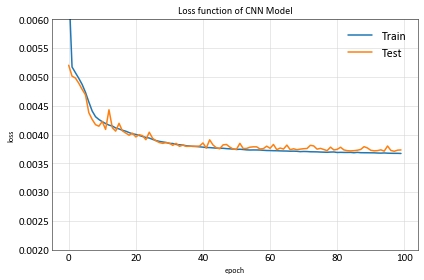

4-conv-2x2-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 23s 262us/sample - loss: 0.0087 - accuracy: 0.0852 - val_loss: 0.0052 - val_accuracy: 0.0821
Epoch 2/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0050 - accuracy: 0.0830 - val_loss: 0.0046 - val_accuracy: 0.0820
Epoch 3/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0047 - accuracy: 0.0830 - val_loss: 0.0045 - val_accuracy: 0.0820
Epoch 4/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0045 - accuracy: 0.0839 - val_loss: 0.0045 - val_accuracy: 0.0822
Epoch 5/100
87120/87120 [==============================] - 22s 249us/sample - loss: 0.0043 - accuracy: 0.0857 - val_loss: 0.0041 - val_accuracy: 0.0841
Epoch 6/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0041 - accuracy: 0.0959 - val_loss: 0.0039 - val_accuracy: 0.1191
Epoch

87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0804 - val_loss: 0.0034 - val_accuracy: 0.0776
Epoch 55/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0805 - val_loss: 0.0033 - val_accuracy: 0.0764
Epoch 56/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0803 - val_loss: 0.0034 - val_accuracy: 0.0768
Epoch 57/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - accuracy: 0.0797 - val_loss: 0.0033 - val_accuracy: 0.0761
Epoch 58/100
87120/87120 [==============================] - 22s 253us/sample - loss: 0.0034 - accuracy: 0.0794 - val_loss: 0.0034 - val_accuracy: 0.0756
Epoch 59/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0034 - accuracy: 0.0786 - val_loss: 0.0033 - val_accuracy: 0.0765
Epoch 60/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - a

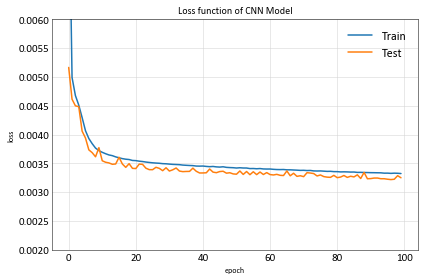

4-conv-2x2-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 22s 256us/sample - loss: 0.0086 - accuracy: 0.0906 - val_loss: 0.0054 - val_accuracy: 0.0898
Epoch 2/100
87120/87120 [==============================] - 22s 253us/sample - loss: 0.0051 - accuracy: 0.0887 - val_loss: 0.0047 - val_accuracy: 0.0898
Epoch 3/100
87120/87120 [==============================] - 22s 249us/sample - loss: 0.0048 - accuracy: 0.0913 - val_loss: 0.0046 - val_accuracy: 0.0929
Epoch 4/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0045 - accuracy: 0.0944 - val_loss: 0.0043 - val_accuracy: 0.0966
Epoch 5/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0042 - accuracy: 0.1013 - val_loss: 0.0040 - val_accuracy: 0.1023
Epoch 6/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0041 - accuracy: 0.1073 - val_loss: 0.0039 - val_accuracy: 0.1075
Epoc

87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0966 - val_loss: 0.0034 - val_accuracy: 0.0988
Epoch 55/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - accuracy: 0.0976 - val_loss: 0.0033 - val_accuracy: 0.0968
Epoch 56/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0977 - val_loss: 0.0033 - val_accuracy: 0.0970
Epoch 57/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0034 - accuracy: 0.0972 - val_loss: 0.0034 - val_accuracy: 0.0977
Epoch 58/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0973 - val_loss: 0.0034 - val_accuracy: 0.0966
Epoch 59/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0964 - val_loss: 0.0033 - val_accuracy: 0.0973
Epoch 60/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - a

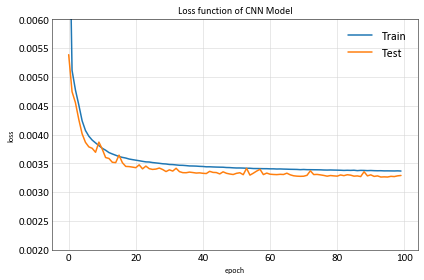

4-conv-2x2-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 22s 256us/sample - loss: 0.0101 - accuracy: 0.1041 - val_loss: 0.0052 - val_accuracy: 0.1047
Epoch 2/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0051 - accuracy: 0.1063 - val_loss: 0.0049 - val_accuracy: 0.1047
Epoch 3/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0049 - accuracy: 0.1079 - val_loss: 0.0048 - val_accuracy: 0.1046
Epoch 4/100
87120/87120 [==============================] - 22s 249us/sample - loss: 0.0047 - accuracy: 0.1093 - val_loss: 0.0045 - val_accuracy: 0.1051
Epoch 5/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0045 - accuracy: 0.1162 - val_loss: 0.0042 - val_accuracy: 0.1278
Epoch 6/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0042 - accuracy: 0.1363 - val_loss: 0.0038 - val_accuracy: 0.1417
Epoc

87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0993 - val_loss: 0.0035 - val_accuracy: 0.0997
Epoch 55/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - accuracy: 0.0993 - val_loss: 0.0033 - val_accuracy: 0.0995
Epoch 56/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0992 - val_loss: 0.0034 - val_accuracy: 0.0984
Epoch 57/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.1001 - val_loss: 0.0033 - val_accuracy: 0.0987
Epoch 58/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - accuracy: 0.0983 - val_loss: 0.0034 - val_accuracy: 0.0960
Epoch 59/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0980 - val_loss: 0.0033 - val_accuracy: 0.0990
Epoch 60/100
87120/87120 [==============================] - 22s 249us/sample - loss: 0.0034 - a

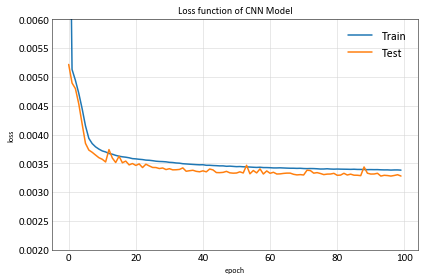

6-conv-2x2-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 291us/sample - loss: 0.0146 - accuracy: 0.0834 - val_loss: 0.0054 - val_accuracy: 0.0618
Epoch 2/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0054 - accuracy: 0.0778 - val_loss: 0.0047 - val_accuracy: 0.0813
Epoch 3/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0049 - accuracy: 0.0821 - val_loss: 0.0042 - val_accuracy: 0.0768
Epoch 4/100
87120/87120 [==============================] - 24s 279us/sample - loss: 0.0044 - accuracy: 0.0798 - val_loss: 0.0039 - val_accuracy: 0.0677
Epoch 5/100
87120/87120 [==============================] - 24s 279us/sample - loss: 0.0041 - accuracy: 0.0745 - val_loss: 0.0038 - val_accuracy: 0.0712
Epoch 6/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0040 - accuracy: 0.0749 - val_loss: 0.0037 - val_accuracy: 0.0710
Epoch

87120/87120 [==============================] - 25s 281us/sample - loss: 0.0031 - accuracy: 0.2361 - val_loss: 0.0031 - val_accuracy: 0.2354
Epoch 55/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0031 - accuracy: 0.2359 - val_loss: 0.0030 - val_accuracy: 0.2400
Epoch 56/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0031 - accuracy: 0.2348 - val_loss: 0.0031 - val_accuracy: 0.2297
Epoch 57/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0031 - accuracy: 0.2337 - val_loss: 0.0030 - val_accuracy: 0.2381
Epoch 58/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0031 - accuracy: 0.2340 - val_loss: 0.0030 - val_accuracy: 0.2396
Epoch 59/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0031 - accuracy: 0.2353 - val_loss: 0.0030 - val_accuracy: 0.2422
Epoch 60/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0031 - a

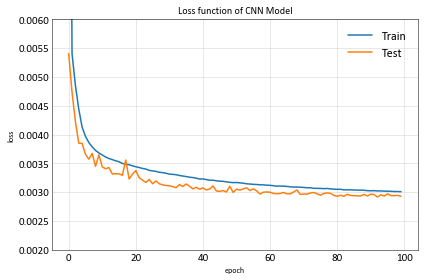

6-conv-2x2-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0119 - accuracy: 0.0950 - val_loss: 0.0054 - val_accuracy: 0.0924
Epoch 2/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0053 - accuracy: 0.0919 - val_loss: 0.0047 - val_accuracy: 0.0986
Epoch 3/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0047 - accuracy: 0.0937 - val_loss: 0.0040 - val_accuracy: 0.0936
Epoch 4/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0042 - accuracy: 0.0920 - val_loss: 0.0039 - val_accuracy: 0.0927
Epoch 5/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0040 - accuracy: 0.0891 - val_loss: 0.0037 - val_accuracy: 0.0871
Epoch 6/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0039 - accuracy: 0.0877 - val_loss: 0.0037 - val_accuracy: 0.0848
Epoc

87120/87120 [==============================] - 24s 276us/sample - loss: 0.0031 - accuracy: 0.2480 - val_loss: 0.0030 - val_accuracy: 0.2489
Epoch 55/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - accuracy: 0.2478 - val_loss: 0.0029 - val_accuracy: 0.2489
Epoch 56/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - accuracy: 0.2484 - val_loss: 0.0030 - val_accuracy: 0.2503
Epoch 57/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - accuracy: 0.2498 - val_loss: 0.0029 - val_accuracy: 0.2506
Epoch 58/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0030 - accuracy: 0.2496 - val_loss: 0.0030 - val_accuracy: 0.2500
Epoch 59/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0030 - accuracy: 0.2510 - val_loss: 0.0029 - val_accuracy: 0.2509
Epoch 60/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - a

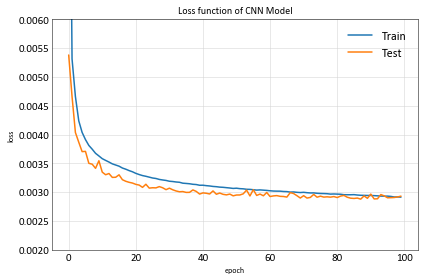

6-conv-2x2-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0112 - accuracy: 0.1090 - val_loss: 0.0050 - val_accuracy: 0.0808
Epoch 2/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0050 - accuracy: 0.0957 - val_loss: 0.0044 - val_accuracy: 0.0825
Epoch 3/100
87120/87120 [==============================] - 24s 279us/sample - loss: 0.0044 - accuracy: 0.0929 - val_loss: 0.0040 - val_accuracy: 0.0829
Epoch 4/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0040 - accuracy: 0.0926 - val_loss: 0.0037 - val_accuracy: 0.0832
Epoch 5/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0038 - accuracy: 0.0891 - val_loss: 0.0036 - val_accuracy: 0.0804
Epoch 6/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0037 - accuracy: 0.0869 - val_loss: 0.0037 - val_accuracy: 0.0803
Epoc

87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - accuracy: 0.2465 - val_loss: 0.0029 - val_accuracy: 0.2579
Epoch 55/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0030 - accuracy: 0.2487 - val_loss: 0.0029 - val_accuracy: 0.2567
Epoch 56/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0030 - accuracy: 0.2488 - val_loss: 0.0030 - val_accuracy: 0.2573
Epoch 57/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0030 - accuracy: 0.2508 - val_loss: 0.0029 - val_accuracy: 0.2486
Epoch 58/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0030 - accuracy: 0.2502 - val_loss: 0.0029 - val_accuracy: 0.2527
Epoch 59/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0030 - accuracy: 0.2521 - val_loss: 0.0029 - val_accuracy: 0.2656
Epoch 60/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - a

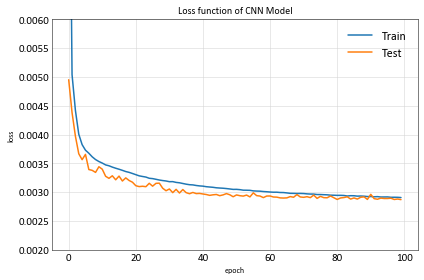

2-conv-3x3-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 240us/sample - loss: 0.0080 - accuracy: 0.1379 - val_loss: 0.0060 - val_accuracy: 0.1047
Epoch 2/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0058 - accuracy: 0.1120 - val_loss: 0.0055 - val_accuracy: 0.1046
Epoch 3/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0055 - accuracy: 0.1091 - val_loss: 0.0052 - val_accuracy: 0.1045
Epoch 4/100
87120/87120 [==============================] - 20s 230us/sample - loss: 0.0049 - accuracy: 0.1087 - val_loss: 0.0048 - val_accuracy: 0.1042
Epoch 5/100
87120/87120 [==============================] - 20s 230us/sample - loss: 0.0046 - accuracy: 0.1065 - val_loss: 0.0044 - val_accuracy: 0.1035
Epoch 6/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0044 - accuracy: 0.1055 - val_loss: 0.0043 - val_accuracy: 0.1032
Epoch

87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1021 - val_loss: 0.0037 - val_accuracy: 0.1019
Epoch 55/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.1020 - val_loss: 0.0037 - val_accuracy: 0.1030
Epoch 56/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1024 - val_loss: 0.0037 - val_accuracy: 0.1033
Epoch 57/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.1024 - val_loss: 0.0037 - val_accuracy: 0.1017
Epoch 58/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1032 - val_loss: 0.0037 - val_accuracy: 0.1013
Epoch 59/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1024 - val_loss: 0.0037 - val_accuracy: 0.1027
Epoch 60/100
87120/87120 [==============================] - 20s 230us/sample - loss: 0.0037 - a

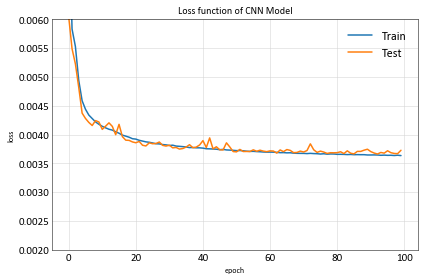

2-conv-3x3-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0071 - accuracy: 0.1023 - val_loss: 0.0056 - val_accuracy: 0.1048
Epoch 2/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0053 - accuracy: 0.1061 - val_loss: 0.0050 - val_accuracy: 0.1051
Epoch 3/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0048 - accuracy: 0.1046 - val_loss: 0.0047 - val_accuracy: 0.1048
Epoch 4/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0047 - accuracy: 0.1036 - val_loss: 0.0050 - val_accuracy: 0.1055
Epoch 5/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0046 - accuracy: 0.1039 - val_loss: 0.0044 - val_accuracy: 0.1034
Epoch 6/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0045 - accuracy: 0.1021 - val_loss: 0.0043 - val_accuracy: 0.1034
Epoc

87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.0966 - val_loss: 0.0037 - val_accuracy: 0.0980
Epoch 55/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.0972 - val_loss: 0.0037 - val_accuracy: 0.0991
Epoch 56/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.0958 - val_loss: 0.0037 - val_accuracy: 0.0978
Epoch 57/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.0964 - val_loss: 0.0037 - val_accuracy: 0.0978
Epoch 58/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.0966 - val_loss: 0.0037 - val_accuracy: 0.0991
Epoch 59/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.0966 - val_loss: 0.0037 - val_accuracy: 0.0989
Epoch 60/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - a

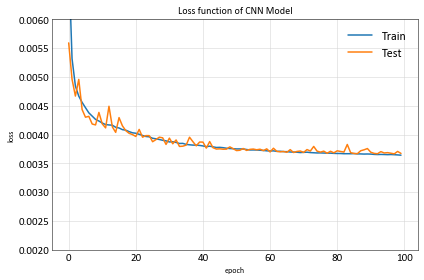

2-conv-3x3-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 238us/sample - loss: 0.0070 - accuracy: 0.1027 - val_loss: 0.0054 - val_accuracy: 0.1047
Epoch 2/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0052 - accuracy: 0.1051 - val_loss: 0.0049 - val_accuracy: 0.1050
Epoch 3/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0048 - accuracy: 0.1051 - val_loss: 0.0050 - val_accuracy: 0.1052
Epoch 4/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0046 - accuracy: 0.1057 - val_loss: 0.0047 - val_accuracy: 0.1048
Epoch 5/100
87120/87120 [==============================] - 20s 230us/sample - loss: 0.0045 - accuracy: 0.1053 - val_loss: 0.0044 - val_accuracy: 0.1038
Epoch 6/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0044 - accuracy: 0.1036 - val_loss: 0.0043 - val_accuracy: 0.1028
Epoc

87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1018 - val_loss: 0.0037 - val_accuracy: 0.1022
Epoch 55/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1020 - val_loss: 0.0039 - val_accuracy: 0.1010
Epoch 56/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1016 - val_loss: 0.0038 - val_accuracy: 0.1027
Epoch 57/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.1013 - val_loss: 0.0037 - val_accuracy: 0.1030
Epoch 58/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1014 - val_loss: 0.0037 - val_accuracy: 0.1022
Epoch 59/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.1018 - val_loss: 0.0037 - val_accuracy: 0.1029
Epoch 60/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - a

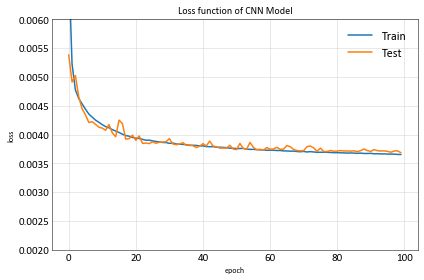

4-conv-3x3-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 24s 280us/sample - loss: 0.0084 - accuracy: 0.1083 - val_loss: 0.0048 - val_accuracy: 0.1047
Epoch 2/100
87120/87120 [==============================] - 23s 268us/sample - loss: 0.0047 - accuracy: 0.1078 - val_loss: 0.0044 - val_accuracy: 0.1048
Epoch 3/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0043 - accuracy: 0.1054 - val_loss: 0.0039 - val_accuracy: 0.1024
Epoch 4/100
87120/87120 [==============================] - 23s 268us/sample - loss: 0.0039 - accuracy: 0.0966 - val_loss: 0.0037 - val_accuracy: 0.0907
Epoch 5/100
87120/87120 [==============================] - 23s 268us/sample - loss: 0.0037 - accuracy: 0.0984 - val_loss: 0.0037 - val_accuracy: 0.0846
Epoch 6/100
87120/87120 [==============================] - 23s 269us/sample - loss: 0.0037 - accuracy: 0.0920 - val_loss: 0.0036 - val_accuracy: 0.0889
Epoch

87120/87120 [==============================] - 23s 268us/sample - loss: 0.0033 - accuracy: 0.0651 - val_loss: 0.0033 - val_accuracy: 0.0637
Epoch 55/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0033 - accuracy: 0.0654 - val_loss: 0.0032 - val_accuracy: 0.0634
Epoch 56/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0649 - val_loss: 0.0032 - val_accuracy: 0.0632
Epoch 57/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0033 - accuracy: 0.0653 - val_loss: 0.0032 - val_accuracy: 0.0637
Epoch 58/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0646 - val_loss: 0.0032 - val_accuracy: 0.0636
Epoch 59/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0650 - val_loss: 0.0032 - val_accuracy: 0.0624
Epoch 60/100
87120/87120 [==============================] - 23s 265us/sample - loss: 0.0032 - a

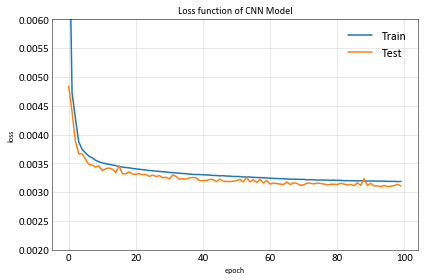

4-conv-3x3-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 24s 273us/sample - loss: 0.0079 - accuracy: 0.0992 - val_loss: 0.0048 - val_accuracy: 0.1006
Epoch 2/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0047 - accuracy: 0.1014 - val_loss: 0.0043 - val_accuracy: 0.1119
Epoch 3/100
87120/87120 [==============================] - 23s 268us/sample - loss: 0.0042 - accuracy: 0.1177 - val_loss: 0.0039 - val_accuracy: 0.1683
Epoch 4/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0039 - accuracy: 0.1581 - val_loss: 0.0039 - val_accuracy: 0.1976
Epoch 5/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0038 - accuracy: 0.1781 - val_loss: 0.0037 - val_accuracy: 0.2010
Epoch 6/100
87120/87120 [==============================] - 23s 265us/sample - loss: 0.0037 - accuracy: 0.1836 - val_loss: 0.0035 - val_accuracy: 0.1900
Epoc

87120/87120 [==============================] - 23s 268us/sample - loss: 0.0033 - accuracy: 0.1081 - val_loss: 0.0032 - val_accuracy: 0.1019
Epoch 55/100
87120/87120 [==============================] - 23s 265us/sample - loss: 0.0033 - accuracy: 0.1074 - val_loss: 0.0032 - val_accuracy: 0.1010
Epoch 56/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.1069 - val_loss: 0.0033 - val_accuracy: 0.0993
Epoch 57/100
87120/87120 [==============================] - 23s 264us/sample - loss: 0.0033 - accuracy: 0.1065 - val_loss: 0.0032 - val_accuracy: 0.0987
Epoch 58/100
87120/87120 [==============================] - 23s 264us/sample - loss: 0.0033 - accuracy: 0.1082 - val_loss: 0.0032 - val_accuracy: 0.0991
Epoch 59/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0033 - accuracy: 0.1079 - val_loss: 0.0032 - val_accuracy: 0.0990
Epoch 60/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - a

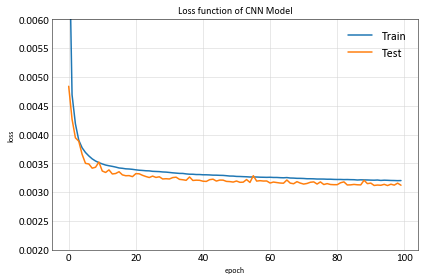

4-conv-3x3-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 24s 273us/sample - loss: 0.0081 - accuracy: 0.1378 - val_loss: 0.0047 - val_accuracy: 0.1022
Epoch 2/100
87120/87120 [==============================] - 23s 268us/sample - loss: 0.0046 - accuracy: 0.1286 - val_loss: 0.0041 - val_accuracy: 0.1419
Epoch 3/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0040 - accuracy: 0.1321 - val_loss: 0.0038 - val_accuracy: 0.1427
Epoch 4/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0038 - accuracy: 0.1444 - val_loss: 0.0036 - val_accuracy: 0.1580
Epoch 5/100
87120/87120 [==============================] - 23s 269us/sample - loss: 0.0037 - accuracy: 0.1419 - val_loss: 0.0036 - val_accuracy: 0.1272
Epoch 6/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0036 - accuracy: 0.1246 - val_loss: 0.0035 - val_accuracy: 0.1246
Epoc

87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0785 - val_loss: 0.0033 - val_accuracy: 0.0727
Epoch 55/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0771 - val_loss: 0.0032 - val_accuracy: 0.0725
Epoch 56/100
87120/87120 [==============================] - 23s 265us/sample - loss: 0.0033 - accuracy: 0.0764 - val_loss: 0.0033 - val_accuracy: 0.0726
Epoch 57/100
87120/87120 [==============================] - 23s 269us/sample - loss: 0.0033 - accuracy: 0.0771 - val_loss: 0.0032 - val_accuracy: 0.0722
Epoch 58/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0033 - accuracy: 0.0756 - val_loss: 0.0032 - val_accuracy: 0.0708
Epoch 59/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0764 - val_loss: 0.0032 - val_accuracy: 0.0691
Epoch 60/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0033 - a

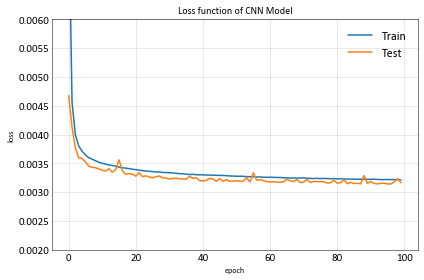

6-conv-3x3-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 27s 313us/sample - loss: 0.0108 - accuracy: 0.0801 - val_loss: 0.0051 - val_accuracy: 0.0701
Epoch 2/100
87120/87120 [==============================] - 26s 302us/sample - loss: 0.0053 - accuracy: 0.0849 - val_loss: 0.0046 - val_accuracy: 0.0773
Epoch 3/100
87120/87120 [==============================] - 26s 302us/sample - loss: 0.0048 - accuracy: 0.0902 - val_loss: 0.0042 - val_accuracy: 0.0875
Epoch 4/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0044 - accuracy: 0.0878 - val_loss: 0.0044 - val_accuracy: 0.0703
Epoch 5/100
87120/87120 [==============================] - 26s 303us/sample - loss: 0.0041 - accuracy: 0.0833 - val_loss: 0.0037 - val_accuracy: 0.0757
Epoch 6/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0039 - accuracy: 0.0800 - val_loss: 0.0036 - val_accuracy: 0.0714
Epoch

87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2682 - val_loss: 0.0027 - val_accuracy: 0.2746
Epoch 55/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2695 - val_loss: 0.0027 - val_accuracy: 0.2748
Epoch 56/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2714 - val_loss: 0.0028 - val_accuracy: 0.2898
Epoch 57/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2744 - val_loss: 0.0027 - val_accuracy: 0.2864
Epoch 58/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0027 - accuracy: 0.2751 - val_loss: 0.0027 - val_accuracy: 0.2887
Epoch 59/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2793 - val_loss: 0.0027 - val_accuracy: 0.2939
Epoch 60/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0027 - a

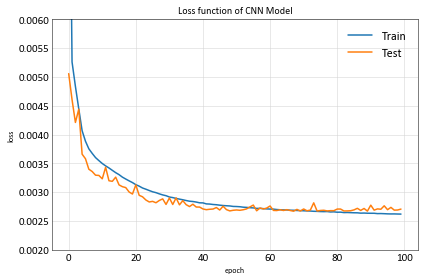

6-conv-3x3-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 27s 307us/sample - loss: 0.0112 - accuracy: 0.0764 - val_loss: 0.0051 - val_accuracy: 0.0653
Epoch 2/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0051 - accuracy: 0.0767 - val_loss: 0.0044 - val_accuracy: 0.0699
Epoch 3/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0045 - accuracy: 0.0750 - val_loss: 0.0038 - val_accuracy: 0.0685
Epoch 4/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0040 - accuracy: 0.0754 - val_loss: 0.0036 - val_accuracy: 0.0712
Epoch 5/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0038 - accuracy: 0.0778 - val_loss: 0.0037 - val_accuracy: 0.0751
Epoch 6/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0037 - accuracy: 0.0819 - val_loss: 0.0036 - val_accuracy: 0.0682
Epoc

87120/87120 [==============================] - 26s 301us/sample - loss: 0.0027 - accuracy: 0.2828 - val_loss: 0.0027 - val_accuracy: 0.2990
Epoch 55/100
87120/87120 [==============================] - 26s 297us/sample - loss: 0.0027 - accuracy: 0.2824 - val_loss: 0.0027 - val_accuracy: 0.3118
Epoch 56/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2860 - val_loss: 0.0028 - val_accuracy: 0.2968
Epoch 57/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0027 - accuracy: 0.2855 - val_loss: 0.0027 - val_accuracy: 0.3147
Epoch 58/100
87120/87120 [==============================] - 26s 299us/sample - loss: 0.0027 - accuracy: 0.2861 - val_loss: 0.0026 - val_accuracy: 0.3145
Epoch 59/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2905 - val_loss: 0.0026 - val_accuracy: 0.3192
Epoch 60/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - a

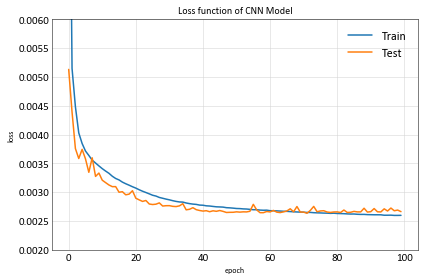

6-conv-3x3-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 27s 308us/sample - loss: 0.0137 - accuracy: 0.1154 - val_loss: 0.0051 - val_accuracy: 0.1725
Epoch 2/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0052 - accuracy: 0.1117 - val_loss: 0.0046 - val_accuracy: 0.1018
Epoch 3/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0047 - accuracy: 0.0992 - val_loss: 0.0042 - val_accuracy: 0.0950
Epoch 4/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0042 - accuracy: 0.0965 - val_loss: 0.0038 - val_accuracy: 0.0913
Epoch 5/100
87120/87120 [==============================] - 26s 299us/sample - loss: 0.0039 - accuracy: 0.0930 - val_loss: 0.0035 - val_accuracy: 0.0838
Epoch 6/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0038 - accuracy: 0.0910 - val_loss: 0.0035 - val_accuracy: 0.0832
Epoc

87120/87120 [==============================] - 26s 299us/sample - loss: 0.0028 - accuracy: 0.2378 - val_loss: 0.0028 - val_accuracy: 0.2393
Epoch 55/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0028 - accuracy: 0.2379 - val_loss: 0.0027 - val_accuracy: 0.2405
Epoch 56/100
87120/87120 [==============================] - 26s 299us/sample - loss: 0.0028 - accuracy: 0.2392 - val_loss: 0.0028 - val_accuracy: 0.2392
Epoch 57/100
87120/87120 [==============================] - 26s 297us/sample - loss: 0.0028 - accuracy: 0.2440 - val_loss: 0.0027 - val_accuracy: 0.2476
Epoch 58/100
87120/87120 [==============================] - 26s 299us/sample - loss: 0.0028 - accuracy: 0.2429 - val_loss: 0.0027 - val_accuracy: 0.2459
Epoch 59/100
87120/87120 [==============================] - 26s 298us/sample - loss: 0.0028 - accuracy: 0.2444 - val_loss: 0.0027 - val_accuracy: 0.2461
Epoch 60/100
87120/87120 [==============================] - 26s 299us/sample - loss: 0.0028 - a

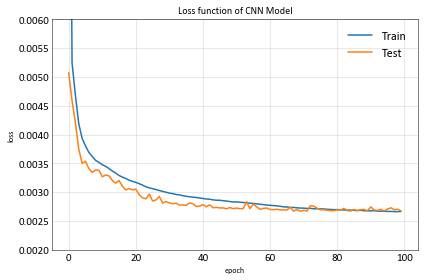

2-conv-4x4-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 246us/sample - loss: 0.0071 - accuracy: 0.0940 - val_loss: 0.0055 - val_accuracy: 0.0944
Epoch 2/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0056 - accuracy: 0.0930 - val_loss: 0.0054 - val_accuracy: 0.0944
Epoch 3/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0054 - accuracy: 0.0913 - val_loss: 0.0052 - val_accuracy: 0.0944
Epoch 4/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0051 - accuracy: 0.0924 - val_loss: 0.0050 - val_accuracy: 0.0943
Epoch 5/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0048 - accuracy: 0.0926 - val_loss: 0.0046 - val_accuracy: 0.0942
Epoch 6/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0045 - accuracy: 0.0937 - val_loss: 0.0044 - val_accuracy: 0.0970
Epoch

87120/87120 [==============================] - 20s 235us/sample - loss: 0.0037 - accuracy: 0.1021 - val_loss: 0.0037 - val_accuracy: 0.1014
Epoch 55/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1020 - val_loss: 0.0037 - val_accuracy: 0.1006
Epoch 56/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1017 - val_loss: 0.0037 - val_accuracy: 0.1007
Epoch 57/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1032 - val_loss: 0.0037 - val_accuracy: 0.0995
Epoch 58/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1022 - val_loss: 0.0037 - val_accuracy: 0.1000
Epoch 59/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1022 - val_loss: 0.0037 - val_accuracy: 0.1001
Epoch 60/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - a

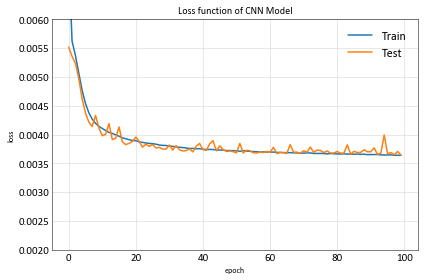

2-conv-4x4-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 241us/sample - loss: 0.0070 - accuracy: 0.1001 - val_loss: 0.0052 - val_accuracy: 0.1041
Epoch 2/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0050 - accuracy: 0.1025 - val_loss: 0.0048 - val_accuracy: 0.1027
Epoch 3/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0048 - accuracy: 0.1034 - val_loss: 0.0046 - val_accuracy: 0.1046
Epoch 4/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0046 - accuracy: 0.1053 - val_loss: 0.0045 - val_accuracy: 0.1036
Epoch 5/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0045 - accuracy: 0.1049 - val_loss: 0.0043 - val_accuracy: 0.1037
Epoch 6/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0044 - accuracy: 0.1039 - val_loss: 0.0042 - val_accuracy: 0.1045
Epoc

87120/87120 [==============================] - 21s 236us/sample - loss: 0.0037 - accuracy: 0.1062 - val_loss: 0.0037 - val_accuracy: 0.1037
Epoch 55/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1054 - val_loss: 0.0037 - val_accuracy: 0.1036
Epoch 56/100
87120/87120 [==============================] - 21s 235us/sample - loss: 0.0037 - accuracy: 0.1063 - val_loss: 0.0037 - val_accuracy: 0.1031
Epoch 57/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1059 - val_loss: 0.0037 - val_accuracy: 0.1043
Epoch 58/100
87120/87120 [==============================] - 21s 235us/sample - loss: 0.0037 - accuracy: 0.1061 - val_loss: 0.0037 - val_accuracy: 0.1030
Epoch 59/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0037 - accuracy: 0.1053 - val_loss: 0.0037 - val_accuracy: 0.1028
Epoch 60/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - a

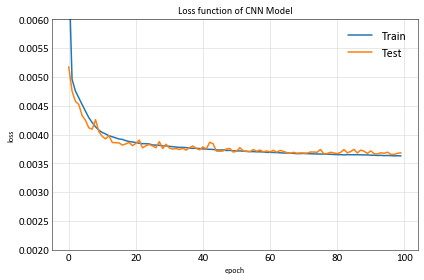

2-conv-4x4-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 240us/sample - loss: 0.0065 - accuracy: 0.0985 - val_loss: 0.0048 - val_accuracy: 0.0995
Epoch 2/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0048 - accuracy: 0.0991 - val_loss: 0.0045 - val_accuracy: 0.0932
Epoch 3/100
87120/87120 [==============================] - 21s 235us/sample - loss: 0.0045 - accuracy: 0.0937 - val_loss: 0.0046 - val_accuracy: 0.0950
Epoch 4/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0044 - accuracy: 0.0938 - val_loss: 0.0050 - val_accuracy: 0.0934
Epoch 5/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0043 - accuracy: 0.0924 - val_loss: 0.0041 - val_accuracy: 0.0942
Epoch 6/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0042 - accuracy: 0.0913 - val_loss: 0.0043 - val_accuracy: 0.0950
Epoc

87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.0987 - val_loss: 0.0037 - val_accuracy: 0.1008
Epoch 55/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0037 - accuracy: 0.1007 - val_loss: 0.0037 - val_accuracy: 0.0997
Epoch 56/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0037 - accuracy: 0.0997 - val_loss: 0.0039 - val_accuracy: 0.0992
Epoch 57/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0037 - accuracy: 0.1000 - val_loss: 0.0037 - val_accuracy: 0.1015
Epoch 58/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0036 - accuracy: 0.1008 - val_loss: 0.0037 - val_accuracy: 0.1002
Epoch 59/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0036 - accuracy: 0.0996 - val_loss: 0.0037 - val_accuracy: 0.0998
Epoch 60/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0036 - a

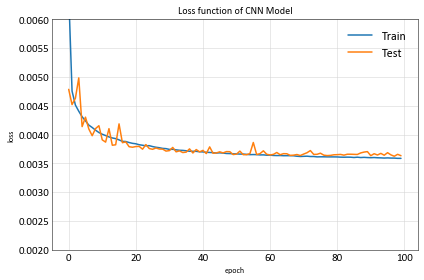

4-conv-4x4-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0072 - accuracy: 0.0921 - val_loss: 0.0047 - val_accuracy: 0.0996
Epoch 2/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0045 - accuracy: 0.0930 - val_loss: 0.0039 - val_accuracy: 0.0897
Epoch 3/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0039 - accuracy: 0.0906 - val_loss: 0.0037 - val_accuracy: 0.0860
Epoch 4/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0038 - accuracy: 0.0911 - val_loss: 0.0037 - val_accuracy: 0.0938
Epoch 5/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0037 - accuracy: 0.1026 - val_loss: 0.0036 - val_accuracy: 0.0926
Epoch 6/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0036 - accuracy: 0.1019 - val_loss: 0.0035 - val_accuracy: 0.1108
Epoch

87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - accuracy: 0.2408 - val_loss: 0.0032 - val_accuracy: 0.2438
Epoch 55/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - accuracy: 0.2409 - val_loss: 0.0031 - val_accuracy: 0.2438
Epoch 56/100
87120/87120 [==============================] - 25s 288us/sample - loss: 0.0032 - accuracy: 0.2409 - val_loss: 0.0032 - val_accuracy: 0.2438
Epoch 57/100
87120/87120 [==============================] - 25s 291us/sample - loss: 0.0032 - accuracy: 0.2410 - val_loss: 0.0031 - val_accuracy: 0.2437
Epoch 58/100
87120/87120 [==============================] - 25s 288us/sample - loss: 0.0032 - accuracy: 0.2409 - val_loss: 0.0032 - val_accuracy: 0.2438
Epoch 59/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0032 - accuracy: 0.2409 - val_loss: 0.0031 - val_accuracy: 0.2438
Epoch 60/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - a

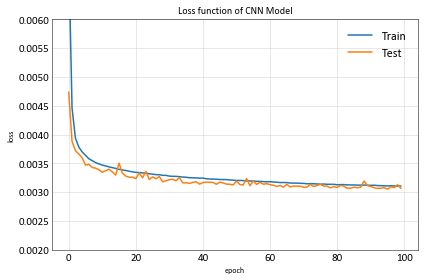

4-conv-4x4-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 26s 293us/sample - loss: 0.0075 - accuracy: 0.0816 - val_loss: 0.0048 - val_accuracy: 0.0822
Epoch 2/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0046 - accuracy: 0.0837 - val_loss: 0.0042 - val_accuracy: 0.0835
Epoch 3/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0041 - accuracy: 0.0862 - val_loss: 0.0037 - val_accuracy: 0.0863
Epoch 4/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0038 - accuracy: 0.0889 - val_loss: 0.0037 - val_accuracy: 0.0920
Epoch 5/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0037 - accuracy: 0.0916 - val_loss: 0.0035 - val_accuracy: 0.0871
Epoch 6/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0036 - accuracy: 0.0890 - val_loss: 0.0035 - val_accuracy: 0.0866
Epoc

87120/87120 [==============================] - 25s 285us/sample - loss: 0.0032 - accuracy: 0.2339 - val_loss: 0.0033 - val_accuracy: 0.2355
Epoch 55/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0032 - accuracy: 0.2351 - val_loss: 0.0031 - val_accuracy: 0.2355
Epoch 56/100
87120/87120 [==============================] - 25s 287us/sample - loss: 0.0032 - accuracy: 0.2340 - val_loss: 0.0032 - val_accuracy: 0.2398
Epoch 57/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0032 - accuracy: 0.2347 - val_loss: 0.0031 - val_accuracy: 0.2400
Epoch 58/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0032 - accuracy: 0.2354 - val_loss: 0.0031 - val_accuracy: 0.2388
Epoch 59/100
87120/87120 [==============================] - 25s 287us/sample - loss: 0.0032 - accuracy: 0.2359 - val_loss: 0.0031 - val_accuracy: 0.2421
Epoch 60/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0032 - a

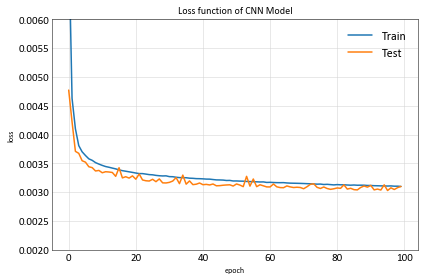

4-conv-4x4-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 26s 295us/sample - loss: 0.0090 - accuracy: 0.0908 - val_loss: 0.0046 - val_accuracy: 0.0937
Epoch 2/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0046 - accuracy: 0.0884 - val_loss: 0.0041 - val_accuracy: 0.0928
Epoch 3/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0040 - accuracy: 0.0902 - val_loss: 0.0037 - val_accuracy: 0.0920
Epoch 4/100
87120/87120 [==============================] - 25s 292us/sample - loss: 0.0038 - accuracy: 0.0955 - val_loss: 0.0036 - val_accuracy: 0.0954
Epoch 5/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0037 - accuracy: 0.1001 - val_loss: 0.0036 - val_accuracy: 0.0922
Epoch 6/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0036 - accuracy: 0.0942 - val_loss: 0.0034 - val_accuracy: 0.0898
Epoc

87120/87120 [==============================] - 25s 288us/sample - loss: 0.0032 - accuracy: 0.0963 - val_loss: 0.0031 - val_accuracy: 0.0876
Epoch 55/100
87120/87120 [==============================] - 25s 288us/sample - loss: 0.0032 - accuracy: 0.0943 - val_loss: 0.0031 - val_accuracy: 0.0877
Epoch 56/100
87120/87120 [==============================] - 25s 288us/sample - loss: 0.0032 - accuracy: 0.0933 - val_loss: 0.0032 - val_accuracy: 0.0898
Epoch 57/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0032 - accuracy: 0.0930 - val_loss: 0.0031 - val_accuracy: 0.0842
Epoch 58/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - accuracy: 0.0913 - val_loss: 0.0031 - val_accuracy: 0.0837
Epoch 59/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - accuracy: 0.0906 - val_loss: 0.0031 - val_accuracy: 0.0882
Epoch 60/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - a

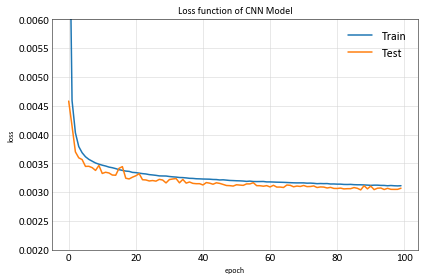

6-conv-4x4-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 31s 351us/sample - loss: 0.0101 - accuracy: 0.1295 - val_loss: 0.0045 - val_accuracy: 0.1404
Epoch 2/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0046 - accuracy: 0.1412 - val_loss: 0.0037 - val_accuracy: 0.1826
Epoch 3/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0039 - accuracy: 0.1567 - val_loss: 0.0034 - val_accuracy: 0.2191
Epoch 4/100
87120/87120 [==============================] - 33s 382us/sample - loss: 0.0037 - accuracy: 0.1596 - val_loss: 0.0034 - val_accuracy: 0.2198
Epoch 5/100
87120/87120 [==============================] - 34s 391us/sample - loss: 0.0036 - accuracy: 0.1752 - val_loss: 0.0033 - val_accuracy: 0.2235
Epoch 6/100
87120/87120 [==============================] - 32s 369us/sample - loss: 0.0035 - accuracy: 0.1907 - val_loss: 0.0035 - val_accuracy: 0.2227
Epoch

87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - accuracy: 0.2794 - val_loss: 0.0026 - val_accuracy: 0.2964
Epoch 55/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2846 - val_loss: 0.0026 - val_accuracy: 0.3069
Epoch 56/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2831 - val_loss: 0.0027 - val_accuracy: 0.3022
Epoch 57/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - accuracy: 0.2840 - val_loss: 0.0026 - val_accuracy: 0.3103
Epoch 58/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2822 - val_loss: 0.0026 - val_accuracy: 0.3069
Epoch 59/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - accuracy: 0.2843 - val_loss: 0.0026 - val_accuracy: 0.3061
Epoch 60/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - a

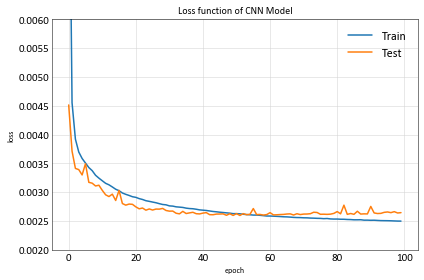

6-conv-4x4-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 30s 347us/sample - loss: 0.0115 - accuracy: 0.0872 - val_loss: 0.0048 - val_accuracy: 0.0899
Epoch 2/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0051 - accuracy: 0.0888 - val_loss: 0.0045 - val_accuracy: 0.0918
Epoch 3/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0044 - accuracy: 0.0871 - val_loss: 0.0037 - val_accuracy: 0.0856
Epoch 4/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0040 - accuracy: 0.0826 - val_loss: 0.0036 - val_accuracy: 0.0815
Epoch 5/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0038 - accuracy: 0.0857 - val_loss: 0.0037 - val_accuracy: 0.0842
Epoch 6/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0037 - accuracy: 0.0979 - val_loss: 0.0034 - val_accuracy: 0.1354
Epoc

87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2569 - val_loss: 0.0027 - val_accuracy: 0.2615
Epoch 55/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - accuracy: 0.2546 - val_loss: 0.0027 - val_accuracy: 0.2549
Epoch 56/100
87120/87120 [==============================] - 29s 336us/sample - loss: 0.0026 - accuracy: 0.2532 - val_loss: 0.0026 - val_accuracy: 0.2697
Epoch 57/100
87120/87120 [==============================] - 29s 337us/sample - loss: 0.0026 - accuracy: 0.2543 - val_loss: 0.0026 - val_accuracy: 0.2627
Epoch 58/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2544 - val_loss: 0.0026 - val_accuracy: 0.2670
Epoch 59/100
87120/87120 [==============================] - 29s 337us/sample - loss: 0.0026 - accuracy: 0.2540 - val_loss: 0.0026 - val_accuracy: 0.2712
Epoch 60/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - a

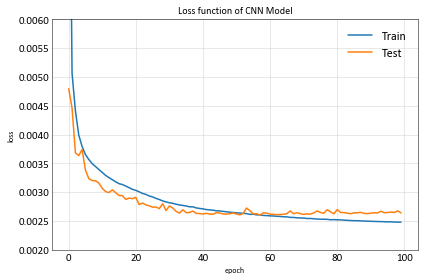

6-conv-4x4-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 30s 345us/sample - loss: 0.0098 - accuracy: 0.0911 - val_loss: 0.0049 - val_accuracy: 0.0775
Epoch 2/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0048 - accuracy: 0.0895 - val_loss: 0.0040 - val_accuracy: 0.0790
Epoch 3/100
87120/87120 [==============================] - 29s 339us/sample - loss: 0.0041 - accuracy: 0.0835 - val_loss: 0.0035 - val_accuracy: 0.0817
Epoch 4/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0038 - accuracy: 0.0806 - val_loss: 0.0034 - val_accuracy: 0.0734
Epoch 5/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0036 - accuracy: 0.0855 - val_loss: 0.0034 - val_accuracy: 0.0675
Epoch 6/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0035 - accuracy: 0.0966 - val_loss: 0.0037 - val_accuracy: 0.0867
Epoc

87120/87120 [==============================] - 29s 339us/sample - loss: 0.0026 - accuracy: 0.2871 - val_loss: 0.0028 - val_accuracy: 0.3073
Epoch 55/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0026 - accuracy: 0.2889 - val_loss: 0.0027 - val_accuracy: 0.3029
Epoch 56/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - accuracy: 0.2879 - val_loss: 0.0026 - val_accuracy: 0.3121
Epoch 57/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2894 - val_loss: 0.0026 - val_accuracy: 0.3032
Epoch 58/100
87120/87120 [==============================] - 29s 337us/sample - loss: 0.0026 - accuracy: 0.2896 - val_loss: 0.0026 - val_accuracy: 0.3107
Epoch 59/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2932 - val_loss: 0.0026 - val_accuracy: 0.3092
Epoch 60/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - a

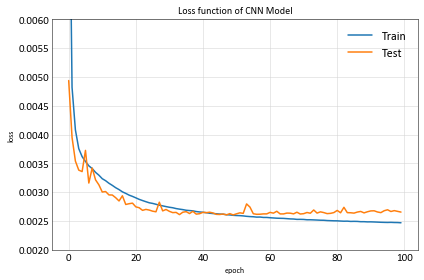

2-conv-5x5-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 240us/sample - loss: 0.0071 - accuracy: 0.1152 - val_loss: 0.0054 - val_accuracy: 0.1008
Epoch 2/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0051 - accuracy: 0.0984 - val_loss: 0.0047 - val_accuracy: 0.0959
Epoch 3/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0046 - accuracy: 0.0926 - val_loss: 0.0044 - val_accuracy: 0.0958
Epoch 4/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0044 - accuracy: 0.0929 - val_loss: 0.0043 - val_accuracy: 0.0961
Epoch 5/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0042 - accuracy: 0.0950 - val_loss: 0.0041 - val_accuracy: 0.0940
Epoch 6/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0041 - accuracy: 0.0936 - val_loss: 0.0040 - val_accuracy: 0.0945
Epoch

87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1037 - val_loss: 0.0037 - val_accuracy: 0.1008
Epoch 55/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1032 - val_loss: 0.0037 - val_accuracy: 0.1013
Epoch 56/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1033 - val_loss: 0.0037 - val_accuracy: 0.0990
Epoch 57/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1036 - val_loss: 0.0037 - val_accuracy: 0.1036
Epoch 58/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0037 - accuracy: 0.1037 - val_loss: 0.0037 - val_accuracy: 0.0998
Epoch 59/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1034 - val_loss: 0.0038 - val_accuracy: 0.1031
Epoch 60/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - a

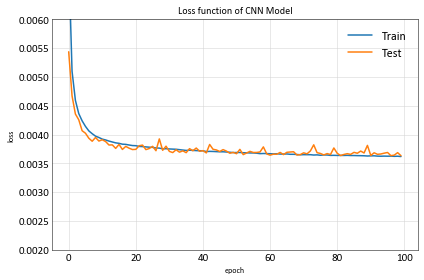

2-conv-5x5-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 241us/sample - loss: 0.0070 - accuracy: 0.0971 - val_loss: 0.0054 - val_accuracy: 0.0936
Epoch 2/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0052 - accuracy: 0.0921 - val_loss: 0.0047 - val_accuracy: 0.0950
Epoch 3/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0046 - accuracy: 0.0954 - val_loss: 0.0045 - val_accuracy: 0.0968
Epoch 4/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0044 - accuracy: 0.0967 - val_loss: 0.0042 - val_accuracy: 0.0952
Epoch 5/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0043 - accuracy: 0.0962 - val_loss: 0.0040 - val_accuracy: 0.0957
Epoch 6/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0042 - accuracy: 0.0967 - val_loss: 0.0039 - val_accuracy: 0.0978
Epoc

87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1066 - val_loss: 0.0037 - val_accuracy: 0.1099
Epoch 55/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0037 - accuracy: 0.1073 - val_loss: 0.0038 - val_accuracy: 0.1077
Epoch 56/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0037 - accuracy: 0.1069 - val_loss: 0.0037 - val_accuracy: 0.1067
Epoch 57/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1071 - val_loss: 0.0037 - val_accuracy: 0.1071
Epoch 58/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1046 - val_loss: 0.0037 - val_accuracy: 0.1073
Epoch 59/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0037 - accuracy: 0.1054 - val_loss: 0.0037 - val_accuracy: 0.1035
Epoch 60/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - a

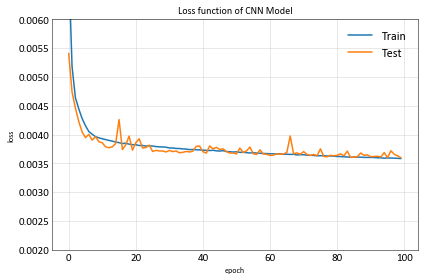

2-conv-5x5-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 240us/sample - loss: 0.0082 - accuracy: 0.0919 - val_loss: 0.0051 - val_accuracy: 0.0946
Epoch 2/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0050 - accuracy: 0.0966 - val_loss: 0.0046 - val_accuracy: 0.0955
Epoch 3/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0046 - accuracy: 0.0978 - val_loss: 0.0045 - val_accuracy: 0.0951
Epoch 4/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0044 - accuracy: 0.0987 - val_loss: 0.0042 - val_accuracy: 0.0939
Epoch 5/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0043 - accuracy: 0.0948 - val_loss: 0.0041 - val_accuracy: 0.0937
Epoch 6/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0042 - accuracy: 0.0951 - val_loss: 0.0040 - val_accuracy: 0.0944
Epoc

87120/87120 [==============================] - 20s 233us/sample - loss: 0.0036 - accuracy: 0.1066 - val_loss: 0.0037 - val_accuracy: 0.1048
Epoch 55/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0036 - accuracy: 0.1075 - val_loss: 0.0037 - val_accuracy: 0.1046
Epoch 56/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0036 - accuracy: 0.1071 - val_loss: 0.0036 - val_accuracy: 0.1053
Epoch 57/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0036 - accuracy: 0.1072 - val_loss: 0.0036 - val_accuracy: 0.1042
Epoch 58/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0036 - accuracy: 0.1063 - val_loss: 0.0037 - val_accuracy: 0.1045
Epoch 59/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0036 - accuracy: 0.1063 - val_loss: 0.0036 - val_accuracy: 0.1059
Epoch 60/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0036 - a

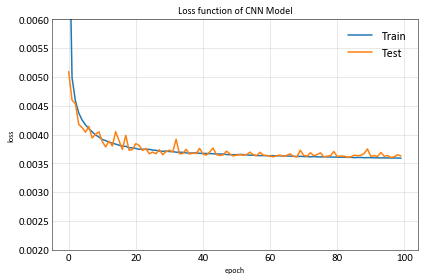

4-conv-5x5-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 291us/sample - loss: 0.0083 - accuracy: 0.0989 - val_loss: 0.0052 - val_accuracy: 0.0997
Epoch 2/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0044 - accuracy: 0.0949 - val_loss: 0.0039 - val_accuracy: 0.0927
Epoch 3/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0039 - accuracy: 0.0899 - val_loss: 0.0036 - val_accuracy: 0.0883
Epoch 4/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0037 - accuracy: 0.0889 - val_loss: 0.0035 - val_accuracy: 0.0834
Epoch 5/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0036 - accuracy: 0.0916 - val_loss: 0.0035 - val_accuracy: 0.0882
Epoch 6/100
87120/87120 [==============================] - 25s 282us/sample - loss: 0.0036 - accuracy: 0.0971 - val_loss: 0.0034 - val_accuracy: 0.0949
Epoch

87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2211 - val_loss: 0.0030 - val_accuracy: 0.2232
Epoch 55/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2252 - val_loss: 0.0031 - val_accuracy: 0.2291
Epoch 56/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2279 - val_loss: 0.0030 - val_accuracy: 0.2435
Epoch 57/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2310 - val_loss: 0.0030 - val_accuracy: 0.2532
Epoch 58/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2336 - val_loss: 0.0030 - val_accuracy: 0.2326
Epoch 59/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0031 - accuracy: 0.2335 - val_loss: 0.0030 - val_accuracy: 0.2111
Epoch 60/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0031 - a

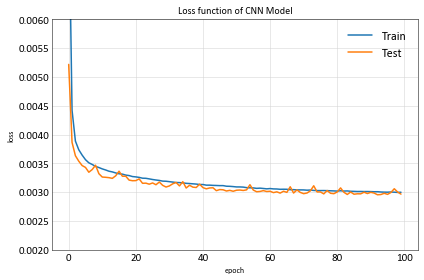

4-conv-5x5-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 291us/sample - loss: 0.0076 - accuracy: 0.0991 - val_loss: 0.0046 - val_accuracy: 0.1031
Epoch 2/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0042 - accuracy: 0.1000 - val_loss: 0.0037 - val_accuracy: 0.0988
Epoch 3/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0038 - accuracy: 0.0997 - val_loss: 0.0036 - val_accuracy: 0.1013
Epoch 4/100
87120/87120 [==============================] - 25s 282us/sample - loss: 0.0037 - accuracy: 0.1078 - val_loss: 0.0035 - val_accuracy: 0.1219
Epoch 5/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0036 - accuracy: 0.1227 - val_loss: 0.0035 - val_accuracy: 0.1197
Epoch 6/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0035 - accuracy: 0.1226 - val_loss: 0.0034 - val_accuracy: 0.1160
Epoc

87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2248 - val_loss: 0.0030 - val_accuracy: 0.2077
Epoch 55/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2221 - val_loss: 0.0030 - val_accuracy: 0.2236
Epoch 56/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2248 - val_loss: 0.0031 - val_accuracy: 0.2363
Epoch 57/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2255 - val_loss: 0.0030 - val_accuracy: 0.2312
Epoch 58/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0031 - accuracy: 0.2253 - val_loss: 0.0030 - val_accuracy: 0.2101
Epoch 59/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2247 - val_loss: 0.0030 - val_accuracy: 0.2318
Epoch 60/100
87120/87120 [==============================] - 25s 287us/sample - loss: 0.0031 - a

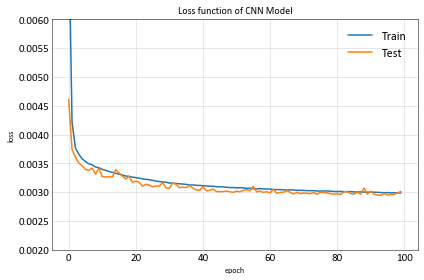

4-conv-5x5-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0077 - accuracy: 0.0920 - val_loss: 0.0045 - val_accuracy: 0.0891
Epoch 2/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0044 - accuracy: 0.0882 - val_loss: 0.0038 - val_accuracy: 0.0813
Epoch 3/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0038 - accuracy: 0.0844 - val_loss: 0.0036 - val_accuracy: 0.0838
Epoch 4/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0037 - accuracy: 0.0818 - val_loss: 0.0035 - val_accuracy: 0.0830
Epoch 5/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0036 - accuracy: 0.0835 - val_loss: 0.0035 - val_accuracy: 0.0763
Epoch 6/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0035 - accuracy: 0.0819 - val_loss: 0.0035 - val_accuracy: 0.0788
Epoc

87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2174 - val_loss: 0.0030 - val_accuracy: 0.2194
Epoch 55/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2208 - val_loss: 0.0031 - val_accuracy: 0.2187
Epoch 56/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0031 - accuracy: 0.2242 - val_loss: 0.0030 - val_accuracy: 0.2365
Epoch 57/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0031 - accuracy: 0.2253 - val_loss: 0.0030 - val_accuracy: 0.2452
Epoch 58/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2244 - val_loss: 0.0030 - val_accuracy: 0.2114
Epoch 59/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2240 - val_loss: 0.0030 - val_accuracy: 0.2363
Epoch 60/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - a

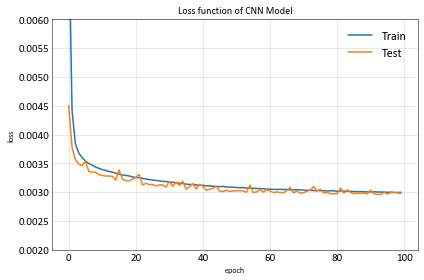

6-conv-5x5-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 31s 353us/sample - loss: 0.0097 - accuracy: 0.0847 - val_loss: 0.0046 - val_accuracy: 0.0818
Epoch 2/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0045 - accuracy: 0.0864 - val_loss: 0.0036 - val_accuracy: 0.0822
Epoch 3/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0039 - accuracy: 0.0878 - val_loss: 0.0037 - val_accuracy: 0.0826
Epoch 4/100
87120/87120 [==============================] - 30s 343us/sample - loss: 0.0037 - accuracy: 0.0886 - val_loss: 0.0033 - val_accuracy: 0.0815
Epoch 5/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0035 - accuracy: 0.0939 - val_loss: 0.0033 - val_accuracy: 0.0712
Epoch 6/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0034 - accuracy: 0.1116 - val_loss: 0.0032 - val_accuracy: 0.1134
Epoch

87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2758 - val_loss: 0.0027 - val_accuracy: 0.2921
Epoch 55/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2743 - val_loss: 0.0027 - val_accuracy: 0.2768
Epoch 56/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2752 - val_loss: 0.0027 - val_accuracy: 0.2966
Epoch 57/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2748 - val_loss: 0.0026 - val_accuracy: 0.3008
Epoch 58/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2746 - val_loss: 0.0026 - val_accuracy: 0.2798
Epoch 59/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2730 - val_loss: 0.0027 - val_accuracy: 0.3052
Epoch 60/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - a

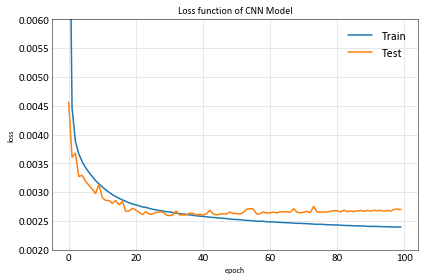

6-conv-5x5-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 31s 350us/sample - loss: 0.0130 - accuracy: 0.1056 - val_loss: 0.0046 - val_accuracy: 0.1030
Epoch 2/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0047 - accuracy: 0.1305 - val_loss: 0.0043 - val_accuracy: 0.1632
Epoch 3/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0040 - accuracy: 0.1355 - val_loss: 0.0035 - val_accuracy: 0.1877
Epoch 4/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0038 - accuracy: 0.1489 - val_loss: 0.0034 - val_accuracy: 0.1788
Epoch 5/100
87120/87120 [==============================] - 30s 343us/sample - loss: 0.0036 - accuracy: 0.1418 - val_loss: 0.0034 - val_accuracy: 0.1371
Epoch 6/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0035 - accuracy: 0.1366 - val_loss: 0.0032 - val_accuracy: 0.1641
Epoc

87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - accuracy: 0.2641 - val_loss: 0.0027 - val_accuracy: 0.2791
Epoch 55/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - accuracy: 0.2634 - val_loss: 0.0027 - val_accuracy: 0.2714
Epoch 56/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - accuracy: 0.2653 - val_loss: 0.0026 - val_accuracy: 0.2604
Epoch 57/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2657 - val_loss: 0.0026 - val_accuracy: 0.2758
Epoch 58/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2656 - val_loss: 0.0026 - val_accuracy: 0.2691
Epoch 59/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2651 - val_loss: 0.0026 - val_accuracy: 0.2809
Epoch 60/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - a

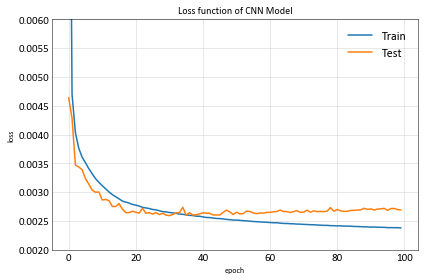

6-conv-5x5-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 30s 349us/sample - loss: 0.0095 - accuracy: 0.1045 - val_loss: 0.0053 - val_accuracy: 0.1045
Epoch 2/100
87120/87120 [==============================] - 30s 344us/sample - loss: 0.0043 - accuracy: 0.1132 - val_loss: 0.0036 - val_accuracy: 0.1031
Epoch 3/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0039 - accuracy: 0.1100 - val_loss: 0.0034 - val_accuracy: 0.0910
Epoch 4/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0037 - accuracy: 0.1004 - val_loss: 0.0036 - val_accuracy: 0.0798
Epoch 5/100
87120/87120 [==============================] - 30s 343us/sample - loss: 0.0035 - accuracy: 0.1211 - val_loss: 0.0033 - val_accuracy: 0.1534
Epoch 6/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0034 - accuracy: 0.1545 - val_loss: 0.0032 - val_accuracy: 0.1983
Epoc

87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2675 - val_loss: 0.0027 - val_accuracy: 0.2754
Epoch 55/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2662 - val_loss: 0.0026 - val_accuracy: 0.2855
Epoch 56/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2690 - val_loss: 0.0026 - val_accuracy: 0.2748
Epoch 57/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2661 - val_loss: 0.0026 - val_accuracy: 0.2705
Epoch 58/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2672 - val_loss: 0.0026 - val_accuracy: 0.2778
Epoch 59/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - accuracy: 0.2661 - val_loss: 0.0026 - val_accuracy: 0.2666
Epoch 60/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - a

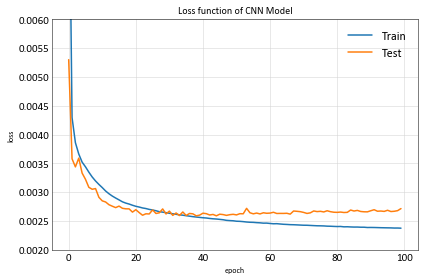

In [23]:
for kernel_size in kernel_sizes:
    for conv_layer in conv_layers:
        for Dropout in Dropouts:
            NAME = "{}-conv-{}x{}-kernel_size-{}-Dropout".format(conv_layer, kernel_size,kernel_size, int(Dropout*100))
            print(NAME)
            
            model = tf.keras.Sequential()
    
            model.add(layers.Conv2D(8, kernel_size=(kernel_size,kernel_size), strides=1, input_shape=[100,100,1], padding="same"))
            model.add(layers.ReLU())
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
            
            layer_size = 16
            for l in range(conv_layer-2):
                model.add(layers.Conv2D(layer_size, kernel_size=(kernel_size,kernel_size), strides=(1,1), padding = "same"))
                model.add(layers.ReLU())
                model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
                layer_size = layer_size*2
    
            model.add(layers.Conv2D(8, kernel_size=(3,3), strides=(1,1), padding = "same"))
            model.add(layers.ReLU())
            
            model.add(layers.Dropout(0.25))
            model.add(layers.Flatten())
            
    
            model.add(layers.Dense(13,activation = 'sigmoid'))

            optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
            model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=optimizer)

            
            history = model.fit(X2_train, y2_train,epochs=100, verbose=1,validation_data=(X2_test, y2_test))

            acc = history.history['accuracy']
            val_acc = history.history['val_accuracy']
            loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochs = range(len(acc))

            
            datafl = np.array([epochs, acc,val_acc,loss,val_loss]).T
            header='\n'.join(["Output", "5","epochs","acc","val_acc","loss","val_loss"])
            np.savetxt('Saved_Results/'+str(conv_layer)+'conv_'+str(kernel_size)+'x'+str(kernel_size)+'kernel_size_'+str(int(Dropout*100))+'Dropout.out', datafl, delimiter=" ",comments='',header=header)

            
            plt.subplot(1,1,1)
            plt.plot(loss)
            plt.plot(val_loss)
            plt.title('Loss function of CNN Model')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['Train', 'Test'], loc='upper right',fontsize=12)
            plt.ylim(0.002,0.006)
            plt.grid()
            plt.tight_layout()
            plt.savefig('Saved_Images/'+str(conv_layer)+'conv_'+str(kernel_size)+'x'+str(kernel_size)+'kernel_size_'+str(int(Dropout*100))+'Dropout.png', dpi=300, bbox_inches='tight')

            plt.show()

            model.save('Saved_models/Model_'+str(conv_layer)+'conv_'+str(kernel_size)+'x'+str(kernel_size)+'kernel_size_'+str(int(Dropout*100))+'Dropout.h5')
            
            

# CNN-2 : Predict the experimental Variogram values at pre-set lag distances 

In [21]:
kernel_sizes = [3]
conv_layers = [6]
Dropouts = [0.25]
Namelist=[]
for kernel_size in kernel_sizes:
    for conv_layer in conv_layers:
        for Dropout in Dropouts:
            NAME = "{}-conv-{}x{}-kernel_size-{}-Dropout".format(conv_layer, kernel_size,kernel_size, int(Dropout*100))
            print(NAME)
            Namelist.append(NAME)

2-conv-2x2-kernel_size-0-Dropout
2-conv-2x2-kernel_size-25-Dropout
2-conv-2x2-kernel_size-50-Dropout
4-conv-2x2-kernel_size-0-Dropout
4-conv-2x2-kernel_size-25-Dropout
4-conv-2x2-kernel_size-50-Dropout
6-conv-2x2-kernel_size-0-Dropout
6-conv-2x2-kernel_size-25-Dropout
6-conv-2x2-kernel_size-50-Dropout
2-conv-3x3-kernel_size-0-Dropout
2-conv-3x3-kernel_size-25-Dropout
2-conv-3x3-kernel_size-50-Dropout
4-conv-3x3-kernel_size-0-Dropout
4-conv-3x3-kernel_size-25-Dropout
4-conv-3x3-kernel_size-50-Dropout
6-conv-3x3-kernel_size-0-Dropout
6-conv-3x3-kernel_size-25-Dropout
6-conv-3x3-kernel_size-50-Dropout
2-conv-4x4-kernel_size-0-Dropout
2-conv-4x4-kernel_size-25-Dropout
2-conv-4x4-kernel_size-50-Dropout
4-conv-4x4-kernel_size-0-Dropout
4-conv-4x4-kernel_size-25-Dropout
4-conv-4x4-kernel_size-50-Dropout
6-conv-4x4-kernel_size-0-Dropout
6-conv-4x4-kernel_size-25-Dropout
6-conv-4x4-kernel_size-50-Dropout
2-conv-5x5-kernel_size-0-Dropout
2-conv-5x5-kernel_size-25-Dropout
2-conv-5x5-kernel_size-5

In [22]:
for i in Namelist:
    imgdir = (('logs/{}').format(i))
    gs.mkdir(imgdir)

2-conv-2x2-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 26s 304us/sample - loss: 0.0069 - accuracy: 0.1006 - val_loss: 0.0057 - val_accuracy: 0.1050
Epoch 2/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0056 - accuracy: 0.1031 - val_loss: 0.0054 - val_accuracy: 0.1007
Epoch 3/100
87120/87120 [==============================] - 21s 241us/sample - loss: 0.0054 - accuracy: 0.0981 - val_loss: 0.0052 - val_accuracy: 0.1023
Epoch 4/100
87120/87120 [==============================] - 21s 242us/sample - loss: 0.0050 - accuracy: 0.1019 - val_loss: 0.0047 - val_accuracy: 0.1048
Epoch 5/100
87120/87120 [==============================] - 21s 243us/sample - loss: 0.0045 - accuracy: 0.1037 - val_loss: 0.0043 - val_accuracy: 0.1040
Epoch 6/100
87120/87120 [==============================] - 21s 243us/sample - loss: 0.0043 - accuracy: 0.1038 - val_loss: 0.0042 - val_accuracy: 0.1024
Epoch

87120/87120 [==============================] - 22s 252us/sample - loss: 0.0037 - accuracy: 0.0949 - val_loss: 0.0037 - val_accuracy: 0.0960
Epoch 55/100
87120/87120 [==============================] - 22s 255us/sample - loss: 0.0037 - accuracy: 0.0959 - val_loss: 0.0037 - val_accuracy: 0.0978
Epoch 56/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0037 - accuracy: 0.0962 - val_loss: 0.0037 - val_accuracy: 0.0963
Epoch 57/100
87120/87120 [==============================] - 22s 253us/sample - loss: 0.0037 - accuracy: 0.0970 - val_loss: 0.0037 - val_accuracy: 0.0974
Epoch 58/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0037 - accuracy: 0.0965 - val_loss: 0.0037 - val_accuracy: 0.0966
Epoch 59/100
87120/87120 [==============================] - 22s 258us/sample - loss: 0.0037 - accuracy: 0.0964 - val_loss: 0.0037 - val_accuracy: 0.0950
Epoch 60/100
87120/87120 [==============================] - 22s 254us/sample - loss: 0.0037 - a

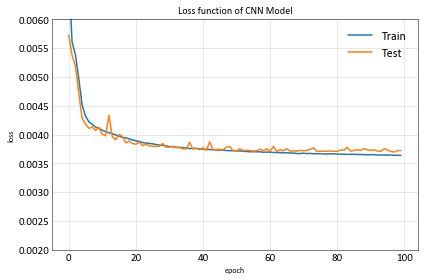

2-conv-2x2-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 23s 261us/sample - loss: 0.0074 - accuracy: 0.1027 - val_loss: 0.0054 - val_accuracy: 0.1050
Epoch 2/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0054 - accuracy: 0.1066 - val_loss: 0.0052 - val_accuracy: 0.1043
Epoch 3/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0051 - accuracy: 0.1082 - val_loss: 0.0049 - val_accuracy: 0.1047
Epoch 4/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0048 - accuracy: 0.1079 - val_loss: 0.0046 - val_accuracy: 0.1043
Epoch 5/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0045 - accuracy: 0.1079 - val_loss: 0.0044 - val_accuracy: 0.1038
Epoch 6/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0044 - accuracy: 0.1072 - val_loss: 0.0043 - val_accuracy: 0.1046
Epoc

87120/87120 [==============================] - 22s 251us/sample - loss: 0.0038 - accuracy: 0.1004 - val_loss: 0.0038 - val_accuracy: 0.1028
Epoch 55/100
87120/87120 [==============================] - 22s 247us/sample - loss: 0.0038 - accuracy: 0.0997 - val_loss: 0.0038 - val_accuracy: 0.0994
Epoch 56/100
87120/87120 [==============================] - 22s 253us/sample - loss: 0.0038 - accuracy: 0.0998 - val_loss: 0.0038 - val_accuracy: 0.0993
Epoch 57/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0038 - accuracy: 0.1003 - val_loss: 0.0038 - val_accuracy: 0.1028
Epoch 58/100
87120/87120 [==============================] - 22s 247us/sample - loss: 0.0038 - accuracy: 0.1007 - val_loss: 0.0038 - val_accuracy: 0.1010
Epoch 59/100
87120/87120 [==============================] - 22s 249us/sample - loss: 0.0038 - accuracy: 0.0999 - val_loss: 0.0038 - val_accuracy: 0.1000
Epoch 60/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0038 - a

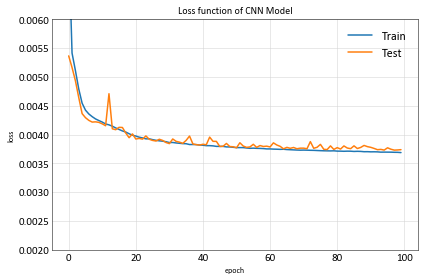

2-conv-2x2-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 23s 263us/sample - loss: 0.0066 - accuracy: 0.1017 - val_loss: 0.0052 - val_accuracy: 0.1047
Epoch 2/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0052 - accuracy: 0.1075 - val_loss: 0.0050 - val_accuracy: 0.1047
Epoch 3/100
87120/87120 [==============================] - 22s 257us/sample - loss: 0.0051 - accuracy: 0.1078 - val_loss: 0.0050 - val_accuracy: 0.1047
Epoch 4/100
87120/87120 [==============================] - 22s 255us/sample - loss: 0.0050 - accuracy: 0.1079 - val_loss: 0.0049 - val_accuracy: 0.1047
Epoch 5/100
87120/87120 [==============================] - 22s 254us/sample - loss: 0.0049 - accuracy: 0.1079 - val_loss: 0.0048 - val_accuracy: 0.1047
Epoch 6/100
87120/87120 [==============================] - 22s 257us/sample - loss: 0.0047 - accuracy: 0.1079 - val_loss: 0.0047 - val_accuracy: 0.1047
Epoc

87120/87120 [==============================] - 23s 258us/sample - loss: 0.0037 - accuracy: 0.1080 - val_loss: 0.0038 - val_accuracy: 0.1043
Epoch 55/100
87120/87120 [==============================] - 22s 256us/sample - loss: 0.0037 - accuracy: 0.1076 - val_loss: 0.0038 - val_accuracy: 0.1047
Epoch 56/100
87120/87120 [==============================] - 22s 253us/sample - loss: 0.0037 - accuracy: 0.1076 - val_loss: 0.0038 - val_accuracy: 0.1047
Epoch 57/100
87120/87120 [==============================] - 22s 255us/sample - loss: 0.0037 - accuracy: 0.1074 - val_loss: 0.0038 - val_accuracy: 0.1046
Epoch 58/100
87120/87120 [==============================] - 22s 255us/sample - loss: 0.0037 - accuracy: 0.1076 - val_loss: 0.0038 - val_accuracy: 0.1045
Epoch 59/100
87120/87120 [==============================] - 22s 255us/sample - loss: 0.0037 - accuracy: 0.1076 - val_loss: 0.0038 - val_accuracy: 0.1045
Epoch 60/100
87120/87120 [==============================] - 22s 257us/sample - loss: 0.0037 - a

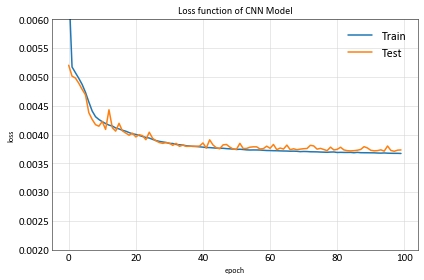

4-conv-2x2-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 23s 262us/sample - loss: 0.0087 - accuracy: 0.0852 - val_loss: 0.0052 - val_accuracy: 0.0821
Epoch 2/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0050 - accuracy: 0.0830 - val_loss: 0.0046 - val_accuracy: 0.0820
Epoch 3/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0047 - accuracy: 0.0830 - val_loss: 0.0045 - val_accuracy: 0.0820
Epoch 4/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0045 - accuracy: 0.0839 - val_loss: 0.0045 - val_accuracy: 0.0822
Epoch 5/100
87120/87120 [==============================] - 22s 249us/sample - loss: 0.0043 - accuracy: 0.0857 - val_loss: 0.0041 - val_accuracy: 0.0841
Epoch 6/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0041 - accuracy: 0.0959 - val_loss: 0.0039 - val_accuracy: 0.1191
Epoch

87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0804 - val_loss: 0.0034 - val_accuracy: 0.0776
Epoch 55/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0805 - val_loss: 0.0033 - val_accuracy: 0.0764
Epoch 56/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0803 - val_loss: 0.0034 - val_accuracy: 0.0768
Epoch 57/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - accuracy: 0.0797 - val_loss: 0.0033 - val_accuracy: 0.0761
Epoch 58/100
87120/87120 [==============================] - 22s 253us/sample - loss: 0.0034 - accuracy: 0.0794 - val_loss: 0.0034 - val_accuracy: 0.0756
Epoch 59/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0034 - accuracy: 0.0786 - val_loss: 0.0033 - val_accuracy: 0.0765
Epoch 60/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - a

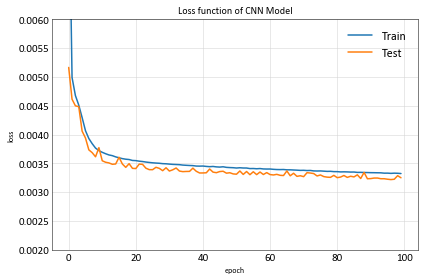

4-conv-2x2-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 22s 256us/sample - loss: 0.0086 - accuracy: 0.0906 - val_loss: 0.0054 - val_accuracy: 0.0898
Epoch 2/100
87120/87120 [==============================] - 22s 253us/sample - loss: 0.0051 - accuracy: 0.0887 - val_loss: 0.0047 - val_accuracy: 0.0898
Epoch 3/100
87120/87120 [==============================] - 22s 249us/sample - loss: 0.0048 - accuracy: 0.0913 - val_loss: 0.0046 - val_accuracy: 0.0929
Epoch 4/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0045 - accuracy: 0.0944 - val_loss: 0.0043 - val_accuracy: 0.0966
Epoch 5/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0042 - accuracy: 0.1013 - val_loss: 0.0040 - val_accuracy: 0.1023
Epoch 6/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0041 - accuracy: 0.1073 - val_loss: 0.0039 - val_accuracy: 0.1075
Epoc

87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0966 - val_loss: 0.0034 - val_accuracy: 0.0988
Epoch 55/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - accuracy: 0.0976 - val_loss: 0.0033 - val_accuracy: 0.0968
Epoch 56/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0977 - val_loss: 0.0033 - val_accuracy: 0.0970
Epoch 57/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0034 - accuracy: 0.0972 - val_loss: 0.0034 - val_accuracy: 0.0977
Epoch 58/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0973 - val_loss: 0.0034 - val_accuracy: 0.0966
Epoch 59/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0964 - val_loss: 0.0033 - val_accuracy: 0.0973
Epoch 60/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - a

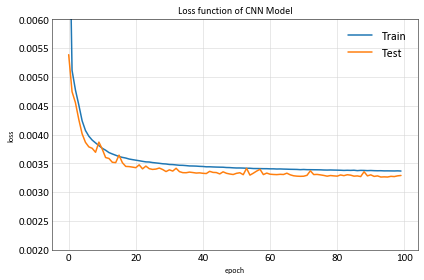

4-conv-2x2-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 22s 256us/sample - loss: 0.0101 - accuracy: 0.1041 - val_loss: 0.0052 - val_accuracy: 0.1047
Epoch 2/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0051 - accuracy: 0.1063 - val_loss: 0.0049 - val_accuracy: 0.1047
Epoch 3/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0049 - accuracy: 0.1079 - val_loss: 0.0048 - val_accuracy: 0.1046
Epoch 4/100
87120/87120 [==============================] - 22s 249us/sample - loss: 0.0047 - accuracy: 0.1093 - val_loss: 0.0045 - val_accuracy: 0.1051
Epoch 5/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0045 - accuracy: 0.1162 - val_loss: 0.0042 - val_accuracy: 0.1278
Epoch 6/100
87120/87120 [==============================] - 22s 252us/sample - loss: 0.0042 - accuracy: 0.1363 - val_loss: 0.0038 - val_accuracy: 0.1417
Epoc

87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0993 - val_loss: 0.0035 - val_accuracy: 0.0997
Epoch 55/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - accuracy: 0.0993 - val_loss: 0.0033 - val_accuracy: 0.0995
Epoch 56/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0992 - val_loss: 0.0034 - val_accuracy: 0.0984
Epoch 57/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.1001 - val_loss: 0.0033 - val_accuracy: 0.0987
Epoch 58/100
87120/87120 [==============================] - 22s 250us/sample - loss: 0.0034 - accuracy: 0.0983 - val_loss: 0.0034 - val_accuracy: 0.0960
Epoch 59/100
87120/87120 [==============================] - 22s 251us/sample - loss: 0.0034 - accuracy: 0.0980 - val_loss: 0.0033 - val_accuracy: 0.0990
Epoch 60/100
87120/87120 [==============================] - 22s 249us/sample - loss: 0.0034 - a

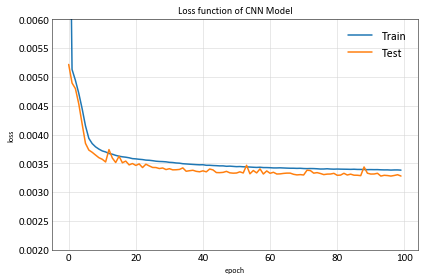

6-conv-2x2-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 291us/sample - loss: 0.0146 - accuracy: 0.0834 - val_loss: 0.0054 - val_accuracy: 0.0618
Epoch 2/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0054 - accuracy: 0.0778 - val_loss: 0.0047 - val_accuracy: 0.0813
Epoch 3/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0049 - accuracy: 0.0821 - val_loss: 0.0042 - val_accuracy: 0.0768
Epoch 4/100
87120/87120 [==============================] - 24s 279us/sample - loss: 0.0044 - accuracy: 0.0798 - val_loss: 0.0039 - val_accuracy: 0.0677
Epoch 5/100
87120/87120 [==============================] - 24s 279us/sample - loss: 0.0041 - accuracy: 0.0745 - val_loss: 0.0038 - val_accuracy: 0.0712
Epoch 6/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0040 - accuracy: 0.0749 - val_loss: 0.0037 - val_accuracy: 0.0710
Epoch

87120/87120 [==============================] - 25s 281us/sample - loss: 0.0031 - accuracy: 0.2361 - val_loss: 0.0031 - val_accuracy: 0.2354
Epoch 55/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0031 - accuracy: 0.2359 - val_loss: 0.0030 - val_accuracy: 0.2400
Epoch 56/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0031 - accuracy: 0.2348 - val_loss: 0.0031 - val_accuracy: 0.2297
Epoch 57/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0031 - accuracy: 0.2337 - val_loss: 0.0030 - val_accuracy: 0.2381
Epoch 58/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0031 - accuracy: 0.2340 - val_loss: 0.0030 - val_accuracy: 0.2396
Epoch 59/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0031 - accuracy: 0.2353 - val_loss: 0.0030 - val_accuracy: 0.2422
Epoch 60/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0031 - a

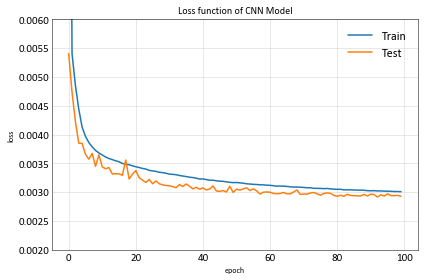

6-conv-2x2-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0119 - accuracy: 0.0950 - val_loss: 0.0054 - val_accuracy: 0.0924
Epoch 2/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0053 - accuracy: 0.0919 - val_loss: 0.0047 - val_accuracy: 0.0986
Epoch 3/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0047 - accuracy: 0.0937 - val_loss: 0.0040 - val_accuracy: 0.0936
Epoch 4/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0042 - accuracy: 0.0920 - val_loss: 0.0039 - val_accuracy: 0.0927
Epoch 5/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0040 - accuracy: 0.0891 - val_loss: 0.0037 - val_accuracy: 0.0871
Epoch 6/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0039 - accuracy: 0.0877 - val_loss: 0.0037 - val_accuracy: 0.0848
Epoc

87120/87120 [==============================] - 24s 276us/sample - loss: 0.0031 - accuracy: 0.2480 - val_loss: 0.0030 - val_accuracy: 0.2489
Epoch 55/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - accuracy: 0.2478 - val_loss: 0.0029 - val_accuracy: 0.2489
Epoch 56/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - accuracy: 0.2484 - val_loss: 0.0030 - val_accuracy: 0.2503
Epoch 57/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - accuracy: 0.2498 - val_loss: 0.0029 - val_accuracy: 0.2506
Epoch 58/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0030 - accuracy: 0.2496 - val_loss: 0.0030 - val_accuracy: 0.2500
Epoch 59/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0030 - accuracy: 0.2510 - val_loss: 0.0029 - val_accuracy: 0.2509
Epoch 60/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - a

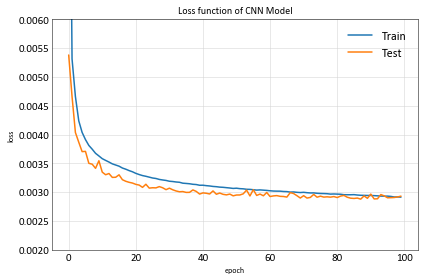

6-conv-2x2-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0112 - accuracy: 0.1090 - val_loss: 0.0050 - val_accuracy: 0.0808
Epoch 2/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0050 - accuracy: 0.0957 - val_loss: 0.0044 - val_accuracy: 0.0825
Epoch 3/100
87120/87120 [==============================] - 24s 279us/sample - loss: 0.0044 - accuracy: 0.0929 - val_loss: 0.0040 - val_accuracy: 0.0829
Epoch 4/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0040 - accuracy: 0.0926 - val_loss: 0.0037 - val_accuracy: 0.0832
Epoch 5/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0038 - accuracy: 0.0891 - val_loss: 0.0036 - val_accuracy: 0.0804
Epoch 6/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0037 - accuracy: 0.0869 - val_loss: 0.0037 - val_accuracy: 0.0803
Epoc

87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - accuracy: 0.2465 - val_loss: 0.0029 - val_accuracy: 0.2579
Epoch 55/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0030 - accuracy: 0.2487 - val_loss: 0.0029 - val_accuracy: 0.2567
Epoch 56/100
87120/87120 [==============================] - 24s 276us/sample - loss: 0.0030 - accuracy: 0.2488 - val_loss: 0.0030 - val_accuracy: 0.2573
Epoch 57/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0030 - accuracy: 0.2508 - val_loss: 0.0029 - val_accuracy: 0.2486
Epoch 58/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0030 - accuracy: 0.2502 - val_loss: 0.0029 - val_accuracy: 0.2527
Epoch 59/100
87120/87120 [==============================] - 24s 278us/sample - loss: 0.0030 - accuracy: 0.2521 - val_loss: 0.0029 - val_accuracy: 0.2656
Epoch 60/100
87120/87120 [==============================] - 24s 277us/sample - loss: 0.0030 - a

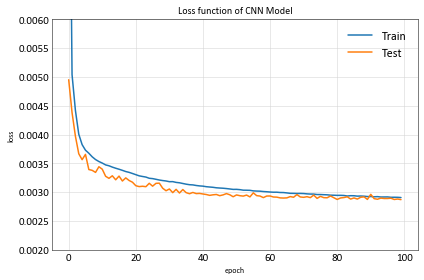

2-conv-3x3-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 240us/sample - loss: 0.0080 - accuracy: 0.1379 - val_loss: 0.0060 - val_accuracy: 0.1047
Epoch 2/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0058 - accuracy: 0.1120 - val_loss: 0.0055 - val_accuracy: 0.1046
Epoch 3/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0055 - accuracy: 0.1091 - val_loss: 0.0052 - val_accuracy: 0.1045
Epoch 4/100
87120/87120 [==============================] - 20s 230us/sample - loss: 0.0049 - accuracy: 0.1087 - val_loss: 0.0048 - val_accuracy: 0.1042
Epoch 5/100
87120/87120 [==============================] - 20s 230us/sample - loss: 0.0046 - accuracy: 0.1065 - val_loss: 0.0044 - val_accuracy: 0.1035
Epoch 6/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0044 - accuracy: 0.1055 - val_loss: 0.0043 - val_accuracy: 0.1032
Epoch

87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1021 - val_loss: 0.0037 - val_accuracy: 0.1019
Epoch 55/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.1020 - val_loss: 0.0037 - val_accuracy: 0.1030
Epoch 56/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1024 - val_loss: 0.0037 - val_accuracy: 0.1033
Epoch 57/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.1024 - val_loss: 0.0037 - val_accuracy: 0.1017
Epoch 58/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1032 - val_loss: 0.0037 - val_accuracy: 0.1013
Epoch 59/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1024 - val_loss: 0.0037 - val_accuracy: 0.1027
Epoch 60/100
87120/87120 [==============================] - 20s 230us/sample - loss: 0.0037 - a

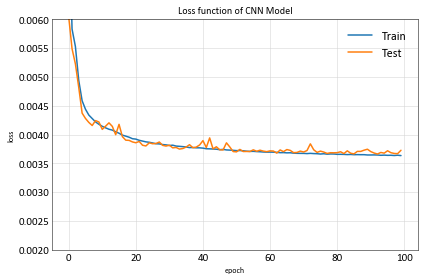

2-conv-3x3-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0071 - accuracy: 0.1023 - val_loss: 0.0056 - val_accuracy: 0.1048
Epoch 2/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0053 - accuracy: 0.1061 - val_loss: 0.0050 - val_accuracy: 0.1051
Epoch 3/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0048 - accuracy: 0.1046 - val_loss: 0.0047 - val_accuracy: 0.1048
Epoch 4/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0047 - accuracy: 0.1036 - val_loss: 0.0050 - val_accuracy: 0.1055
Epoch 5/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0046 - accuracy: 0.1039 - val_loss: 0.0044 - val_accuracy: 0.1034
Epoch 6/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0045 - accuracy: 0.1021 - val_loss: 0.0043 - val_accuracy: 0.1034
Epoc

87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.0966 - val_loss: 0.0037 - val_accuracy: 0.0980
Epoch 55/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.0972 - val_loss: 0.0037 - val_accuracy: 0.0991
Epoch 56/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.0958 - val_loss: 0.0037 - val_accuracy: 0.0978
Epoch 57/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.0964 - val_loss: 0.0037 - val_accuracy: 0.0978
Epoch 58/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.0966 - val_loss: 0.0037 - val_accuracy: 0.0991
Epoch 59/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.0966 - val_loss: 0.0037 - val_accuracy: 0.0989
Epoch 60/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - a

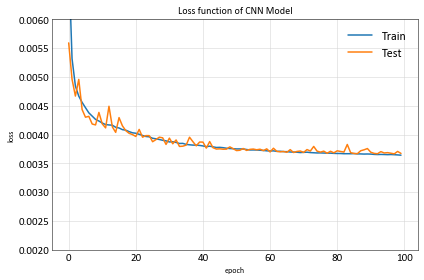

2-conv-3x3-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 238us/sample - loss: 0.0070 - accuracy: 0.1027 - val_loss: 0.0054 - val_accuracy: 0.1047
Epoch 2/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0052 - accuracy: 0.1051 - val_loss: 0.0049 - val_accuracy: 0.1050
Epoch 3/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0048 - accuracy: 0.1051 - val_loss: 0.0050 - val_accuracy: 0.1052
Epoch 4/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0046 - accuracy: 0.1057 - val_loss: 0.0047 - val_accuracy: 0.1048
Epoch 5/100
87120/87120 [==============================] - 20s 230us/sample - loss: 0.0045 - accuracy: 0.1053 - val_loss: 0.0044 - val_accuracy: 0.1038
Epoch 6/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0044 - accuracy: 0.1036 - val_loss: 0.0043 - val_accuracy: 0.1028
Epoc

87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1018 - val_loss: 0.0037 - val_accuracy: 0.1022
Epoch 55/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1020 - val_loss: 0.0039 - val_accuracy: 0.1010
Epoch 56/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1016 - val_loss: 0.0038 - val_accuracy: 0.1027
Epoch 57/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.1013 - val_loss: 0.0037 - val_accuracy: 0.1030
Epoch 58/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1014 - val_loss: 0.0037 - val_accuracy: 0.1022
Epoch 59/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - accuracy: 0.1018 - val_loss: 0.0037 - val_accuracy: 0.1029
Epoch 60/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - a

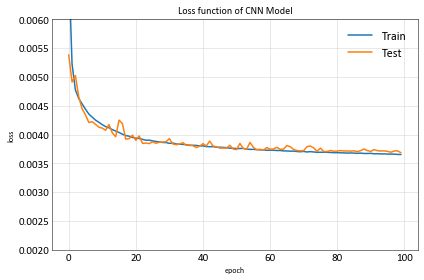

4-conv-3x3-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 24s 280us/sample - loss: 0.0084 - accuracy: 0.1083 - val_loss: 0.0048 - val_accuracy: 0.1047
Epoch 2/100
87120/87120 [==============================] - 23s 268us/sample - loss: 0.0047 - accuracy: 0.1078 - val_loss: 0.0044 - val_accuracy: 0.1048
Epoch 3/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0043 - accuracy: 0.1054 - val_loss: 0.0039 - val_accuracy: 0.1024
Epoch 4/100
87120/87120 [==============================] - 23s 268us/sample - loss: 0.0039 - accuracy: 0.0966 - val_loss: 0.0037 - val_accuracy: 0.0907
Epoch 5/100
87120/87120 [==============================] - 23s 268us/sample - loss: 0.0037 - accuracy: 0.0984 - val_loss: 0.0037 - val_accuracy: 0.0846
Epoch 6/100
87120/87120 [==============================] - 23s 269us/sample - loss: 0.0037 - accuracy: 0.0920 - val_loss: 0.0036 - val_accuracy: 0.0889
Epoch

87120/87120 [==============================] - 23s 268us/sample - loss: 0.0033 - accuracy: 0.0651 - val_loss: 0.0033 - val_accuracy: 0.0637
Epoch 55/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0033 - accuracy: 0.0654 - val_loss: 0.0032 - val_accuracy: 0.0634
Epoch 56/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0649 - val_loss: 0.0032 - val_accuracy: 0.0632
Epoch 57/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0033 - accuracy: 0.0653 - val_loss: 0.0032 - val_accuracy: 0.0637
Epoch 58/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0646 - val_loss: 0.0032 - val_accuracy: 0.0636
Epoch 59/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0650 - val_loss: 0.0032 - val_accuracy: 0.0624
Epoch 60/100
87120/87120 [==============================] - 23s 265us/sample - loss: 0.0032 - a

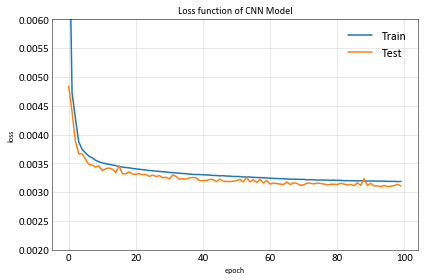

4-conv-3x3-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 24s 273us/sample - loss: 0.0079 - accuracy: 0.0992 - val_loss: 0.0048 - val_accuracy: 0.1006
Epoch 2/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0047 - accuracy: 0.1014 - val_loss: 0.0043 - val_accuracy: 0.1119
Epoch 3/100
87120/87120 [==============================] - 23s 268us/sample - loss: 0.0042 - accuracy: 0.1177 - val_loss: 0.0039 - val_accuracy: 0.1683
Epoch 4/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0039 - accuracy: 0.1581 - val_loss: 0.0039 - val_accuracy: 0.1976
Epoch 5/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0038 - accuracy: 0.1781 - val_loss: 0.0037 - val_accuracy: 0.2010
Epoch 6/100
87120/87120 [==============================] - 23s 265us/sample - loss: 0.0037 - accuracy: 0.1836 - val_loss: 0.0035 - val_accuracy: 0.1900
Epoc

87120/87120 [==============================] - 23s 268us/sample - loss: 0.0033 - accuracy: 0.1081 - val_loss: 0.0032 - val_accuracy: 0.1019
Epoch 55/100
87120/87120 [==============================] - 23s 265us/sample - loss: 0.0033 - accuracy: 0.1074 - val_loss: 0.0032 - val_accuracy: 0.1010
Epoch 56/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.1069 - val_loss: 0.0033 - val_accuracy: 0.0993
Epoch 57/100
87120/87120 [==============================] - 23s 264us/sample - loss: 0.0033 - accuracy: 0.1065 - val_loss: 0.0032 - val_accuracy: 0.0987
Epoch 58/100
87120/87120 [==============================] - 23s 264us/sample - loss: 0.0033 - accuracy: 0.1082 - val_loss: 0.0032 - val_accuracy: 0.0991
Epoch 59/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0033 - accuracy: 0.1079 - val_loss: 0.0032 - val_accuracy: 0.0990
Epoch 60/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - a

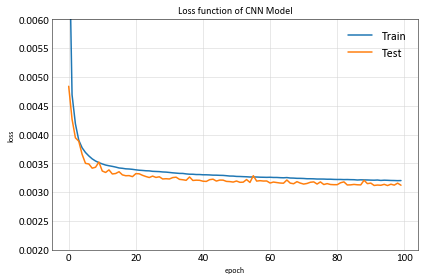

4-conv-3x3-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 24s 273us/sample - loss: 0.0081 - accuracy: 0.1378 - val_loss: 0.0047 - val_accuracy: 0.1022
Epoch 2/100
87120/87120 [==============================] - 23s 268us/sample - loss: 0.0046 - accuracy: 0.1286 - val_loss: 0.0041 - val_accuracy: 0.1419
Epoch 3/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0040 - accuracy: 0.1321 - val_loss: 0.0038 - val_accuracy: 0.1427
Epoch 4/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0038 - accuracy: 0.1444 - val_loss: 0.0036 - val_accuracy: 0.1580
Epoch 5/100
87120/87120 [==============================] - 23s 269us/sample - loss: 0.0037 - accuracy: 0.1419 - val_loss: 0.0036 - val_accuracy: 0.1272
Epoch 6/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0036 - accuracy: 0.1246 - val_loss: 0.0035 - val_accuracy: 0.1246
Epoc

87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0785 - val_loss: 0.0033 - val_accuracy: 0.0727
Epoch 55/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0771 - val_loss: 0.0032 - val_accuracy: 0.0725
Epoch 56/100
87120/87120 [==============================] - 23s 265us/sample - loss: 0.0033 - accuracy: 0.0764 - val_loss: 0.0033 - val_accuracy: 0.0726
Epoch 57/100
87120/87120 [==============================] - 23s 269us/sample - loss: 0.0033 - accuracy: 0.0771 - val_loss: 0.0032 - val_accuracy: 0.0722
Epoch 58/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0033 - accuracy: 0.0756 - val_loss: 0.0032 - val_accuracy: 0.0708
Epoch 59/100
87120/87120 [==============================] - 23s 267us/sample - loss: 0.0033 - accuracy: 0.0764 - val_loss: 0.0032 - val_accuracy: 0.0691
Epoch 60/100
87120/87120 [==============================] - 23s 266us/sample - loss: 0.0033 - a

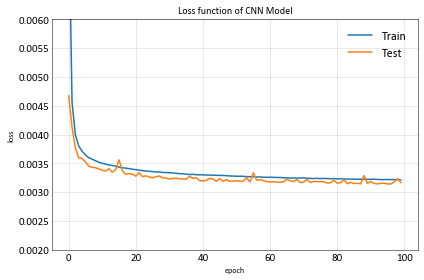

6-conv-3x3-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 27s 313us/sample - loss: 0.0108 - accuracy: 0.0801 - val_loss: 0.0051 - val_accuracy: 0.0701
Epoch 2/100
87120/87120 [==============================] - 26s 302us/sample - loss: 0.0053 - accuracy: 0.0849 - val_loss: 0.0046 - val_accuracy: 0.0773
Epoch 3/100
87120/87120 [==============================] - 26s 302us/sample - loss: 0.0048 - accuracy: 0.0902 - val_loss: 0.0042 - val_accuracy: 0.0875
Epoch 4/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0044 - accuracy: 0.0878 - val_loss: 0.0044 - val_accuracy: 0.0703
Epoch 5/100
87120/87120 [==============================] - 26s 303us/sample - loss: 0.0041 - accuracy: 0.0833 - val_loss: 0.0037 - val_accuracy: 0.0757
Epoch 6/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0039 - accuracy: 0.0800 - val_loss: 0.0036 - val_accuracy: 0.0714
Epoch

87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2682 - val_loss: 0.0027 - val_accuracy: 0.2746
Epoch 55/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2695 - val_loss: 0.0027 - val_accuracy: 0.2748
Epoch 56/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2714 - val_loss: 0.0028 - val_accuracy: 0.2898
Epoch 57/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2744 - val_loss: 0.0027 - val_accuracy: 0.2864
Epoch 58/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0027 - accuracy: 0.2751 - val_loss: 0.0027 - val_accuracy: 0.2887
Epoch 59/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2793 - val_loss: 0.0027 - val_accuracy: 0.2939
Epoch 60/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0027 - a

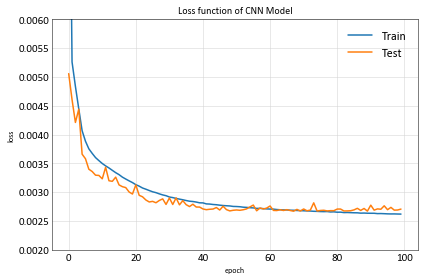

6-conv-3x3-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 27s 307us/sample - loss: 0.0112 - accuracy: 0.0764 - val_loss: 0.0051 - val_accuracy: 0.0653
Epoch 2/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0051 - accuracy: 0.0767 - val_loss: 0.0044 - val_accuracy: 0.0699
Epoch 3/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0045 - accuracy: 0.0750 - val_loss: 0.0038 - val_accuracy: 0.0685
Epoch 4/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0040 - accuracy: 0.0754 - val_loss: 0.0036 - val_accuracy: 0.0712
Epoch 5/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0038 - accuracy: 0.0778 - val_loss: 0.0037 - val_accuracy: 0.0751
Epoch 6/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0037 - accuracy: 0.0819 - val_loss: 0.0036 - val_accuracy: 0.0682
Epoc

87120/87120 [==============================] - 26s 301us/sample - loss: 0.0027 - accuracy: 0.2828 - val_loss: 0.0027 - val_accuracy: 0.2990
Epoch 55/100
87120/87120 [==============================] - 26s 297us/sample - loss: 0.0027 - accuracy: 0.2824 - val_loss: 0.0027 - val_accuracy: 0.3118
Epoch 56/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2860 - val_loss: 0.0028 - val_accuracy: 0.2968
Epoch 57/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0027 - accuracy: 0.2855 - val_loss: 0.0027 - val_accuracy: 0.3147
Epoch 58/100
87120/87120 [==============================] - 26s 299us/sample - loss: 0.0027 - accuracy: 0.2861 - val_loss: 0.0026 - val_accuracy: 0.3145
Epoch 59/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - accuracy: 0.2905 - val_loss: 0.0026 - val_accuracy: 0.3192
Epoch 60/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0027 - a

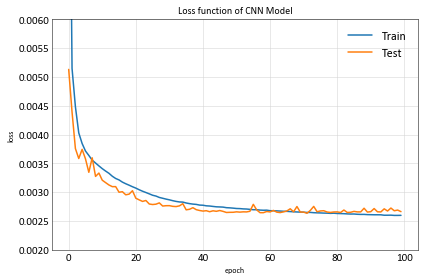

6-conv-3x3-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 27s 308us/sample - loss: 0.0137 - accuracy: 0.1154 - val_loss: 0.0051 - val_accuracy: 0.1725
Epoch 2/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0052 - accuracy: 0.1117 - val_loss: 0.0046 - val_accuracy: 0.1018
Epoch 3/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0047 - accuracy: 0.0992 - val_loss: 0.0042 - val_accuracy: 0.0950
Epoch 4/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0042 - accuracy: 0.0965 - val_loss: 0.0038 - val_accuracy: 0.0913
Epoch 5/100
87120/87120 [==============================] - 26s 299us/sample - loss: 0.0039 - accuracy: 0.0930 - val_loss: 0.0035 - val_accuracy: 0.0838
Epoch 6/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0038 - accuracy: 0.0910 - val_loss: 0.0035 - val_accuracy: 0.0832
Epoc

87120/87120 [==============================] - 26s 299us/sample - loss: 0.0028 - accuracy: 0.2378 - val_loss: 0.0028 - val_accuracy: 0.2393
Epoch 55/100
87120/87120 [==============================] - 26s 301us/sample - loss: 0.0028 - accuracy: 0.2379 - val_loss: 0.0027 - val_accuracy: 0.2405
Epoch 56/100
87120/87120 [==============================] - 26s 299us/sample - loss: 0.0028 - accuracy: 0.2392 - val_loss: 0.0028 - val_accuracy: 0.2392
Epoch 57/100
87120/87120 [==============================] - 26s 297us/sample - loss: 0.0028 - accuracy: 0.2440 - val_loss: 0.0027 - val_accuracy: 0.2476
Epoch 58/100
87120/87120 [==============================] - 26s 299us/sample - loss: 0.0028 - accuracy: 0.2429 - val_loss: 0.0027 - val_accuracy: 0.2459
Epoch 59/100
87120/87120 [==============================] - 26s 298us/sample - loss: 0.0028 - accuracy: 0.2444 - val_loss: 0.0027 - val_accuracy: 0.2461
Epoch 60/100
87120/87120 [==============================] - 26s 299us/sample - loss: 0.0028 - a

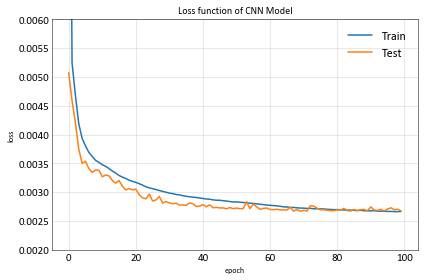

2-conv-4x4-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 246us/sample - loss: 0.0071 - accuracy: 0.0940 - val_loss: 0.0055 - val_accuracy: 0.0944
Epoch 2/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0056 - accuracy: 0.0930 - val_loss: 0.0054 - val_accuracy: 0.0944
Epoch 3/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0054 - accuracy: 0.0913 - val_loss: 0.0052 - val_accuracy: 0.0944
Epoch 4/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0051 - accuracy: 0.0924 - val_loss: 0.0050 - val_accuracy: 0.0943
Epoch 5/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0048 - accuracy: 0.0926 - val_loss: 0.0046 - val_accuracy: 0.0942
Epoch 6/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0045 - accuracy: 0.0937 - val_loss: 0.0044 - val_accuracy: 0.0970
Epoch

87120/87120 [==============================] - 20s 235us/sample - loss: 0.0037 - accuracy: 0.1021 - val_loss: 0.0037 - val_accuracy: 0.1014
Epoch 55/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1020 - val_loss: 0.0037 - val_accuracy: 0.1006
Epoch 56/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1017 - val_loss: 0.0037 - val_accuracy: 0.1007
Epoch 57/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1032 - val_loss: 0.0037 - val_accuracy: 0.0995
Epoch 58/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1022 - val_loss: 0.0037 - val_accuracy: 0.1000
Epoch 59/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1022 - val_loss: 0.0037 - val_accuracy: 0.1001
Epoch 60/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - a

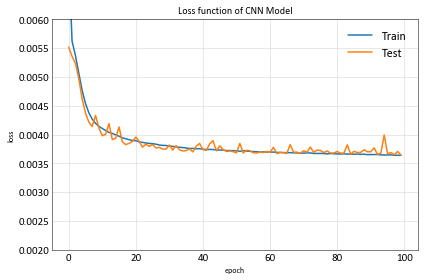

2-conv-4x4-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 241us/sample - loss: 0.0070 - accuracy: 0.1001 - val_loss: 0.0052 - val_accuracy: 0.1041
Epoch 2/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0050 - accuracy: 0.1025 - val_loss: 0.0048 - val_accuracy: 0.1027
Epoch 3/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0048 - accuracy: 0.1034 - val_loss: 0.0046 - val_accuracy: 0.1046
Epoch 4/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0046 - accuracy: 0.1053 - val_loss: 0.0045 - val_accuracy: 0.1036
Epoch 5/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0045 - accuracy: 0.1049 - val_loss: 0.0043 - val_accuracy: 0.1037
Epoch 6/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0044 - accuracy: 0.1039 - val_loss: 0.0042 - val_accuracy: 0.1045
Epoc

87120/87120 [==============================] - 21s 236us/sample - loss: 0.0037 - accuracy: 0.1062 - val_loss: 0.0037 - val_accuracy: 0.1037
Epoch 55/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1054 - val_loss: 0.0037 - val_accuracy: 0.1036
Epoch 56/100
87120/87120 [==============================] - 21s 235us/sample - loss: 0.0037 - accuracy: 0.1063 - val_loss: 0.0037 - val_accuracy: 0.1031
Epoch 57/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1059 - val_loss: 0.0037 - val_accuracy: 0.1043
Epoch 58/100
87120/87120 [==============================] - 21s 235us/sample - loss: 0.0037 - accuracy: 0.1061 - val_loss: 0.0037 - val_accuracy: 0.1030
Epoch 59/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0037 - accuracy: 0.1053 - val_loss: 0.0037 - val_accuracy: 0.1028
Epoch 60/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - a

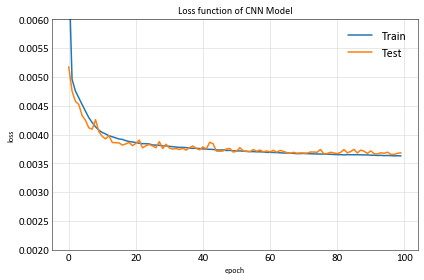

2-conv-4x4-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 240us/sample - loss: 0.0065 - accuracy: 0.0985 - val_loss: 0.0048 - val_accuracy: 0.0995
Epoch 2/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0048 - accuracy: 0.0991 - val_loss: 0.0045 - val_accuracy: 0.0932
Epoch 3/100
87120/87120 [==============================] - 21s 235us/sample - loss: 0.0045 - accuracy: 0.0937 - val_loss: 0.0046 - val_accuracy: 0.0950
Epoch 4/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0044 - accuracy: 0.0938 - val_loss: 0.0050 - val_accuracy: 0.0934
Epoch 5/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0043 - accuracy: 0.0924 - val_loss: 0.0041 - val_accuracy: 0.0942
Epoch 6/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0042 - accuracy: 0.0913 - val_loss: 0.0043 - val_accuracy: 0.0950
Epoc

87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.0987 - val_loss: 0.0037 - val_accuracy: 0.1008
Epoch 55/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0037 - accuracy: 0.1007 - val_loss: 0.0037 - val_accuracy: 0.0997
Epoch 56/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0037 - accuracy: 0.0997 - val_loss: 0.0039 - val_accuracy: 0.0992
Epoch 57/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0037 - accuracy: 0.1000 - val_loss: 0.0037 - val_accuracy: 0.1015
Epoch 58/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0036 - accuracy: 0.1008 - val_loss: 0.0037 - val_accuracy: 0.1002
Epoch 59/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0036 - accuracy: 0.0996 - val_loss: 0.0037 - val_accuracy: 0.0998
Epoch 60/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0036 - a

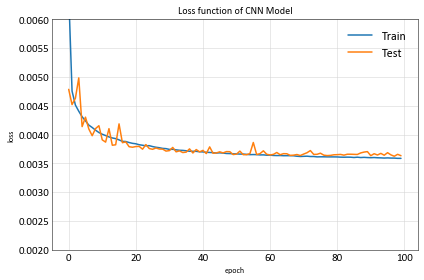

4-conv-4x4-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 26s 300us/sample - loss: 0.0072 - accuracy: 0.0921 - val_loss: 0.0047 - val_accuracy: 0.0996
Epoch 2/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0045 - accuracy: 0.0930 - val_loss: 0.0039 - val_accuracy: 0.0897
Epoch 3/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0039 - accuracy: 0.0906 - val_loss: 0.0037 - val_accuracy: 0.0860
Epoch 4/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0038 - accuracy: 0.0911 - val_loss: 0.0037 - val_accuracy: 0.0938
Epoch 5/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0037 - accuracy: 0.1026 - val_loss: 0.0036 - val_accuracy: 0.0926
Epoch 6/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0036 - accuracy: 0.1019 - val_loss: 0.0035 - val_accuracy: 0.1108
Epoch

87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - accuracy: 0.2408 - val_loss: 0.0032 - val_accuracy: 0.2438
Epoch 55/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - accuracy: 0.2409 - val_loss: 0.0031 - val_accuracy: 0.2438
Epoch 56/100
87120/87120 [==============================] - 25s 288us/sample - loss: 0.0032 - accuracy: 0.2409 - val_loss: 0.0032 - val_accuracy: 0.2438
Epoch 57/100
87120/87120 [==============================] - 25s 291us/sample - loss: 0.0032 - accuracy: 0.2410 - val_loss: 0.0031 - val_accuracy: 0.2437
Epoch 58/100
87120/87120 [==============================] - 25s 288us/sample - loss: 0.0032 - accuracy: 0.2409 - val_loss: 0.0032 - val_accuracy: 0.2438
Epoch 59/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0032 - accuracy: 0.2409 - val_loss: 0.0031 - val_accuracy: 0.2438
Epoch 60/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - a

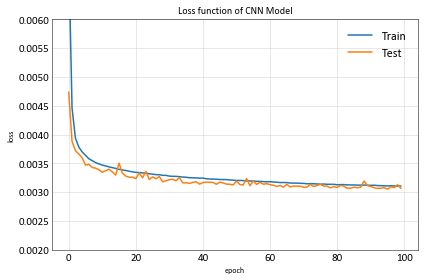

4-conv-4x4-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 26s 293us/sample - loss: 0.0075 - accuracy: 0.0816 - val_loss: 0.0048 - val_accuracy: 0.0822
Epoch 2/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0046 - accuracy: 0.0837 - val_loss: 0.0042 - val_accuracy: 0.0835
Epoch 3/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0041 - accuracy: 0.0862 - val_loss: 0.0037 - val_accuracy: 0.0863
Epoch 4/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0038 - accuracy: 0.0889 - val_loss: 0.0037 - val_accuracy: 0.0920
Epoch 5/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0037 - accuracy: 0.0916 - val_loss: 0.0035 - val_accuracy: 0.0871
Epoch 6/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0036 - accuracy: 0.0890 - val_loss: 0.0035 - val_accuracy: 0.0866
Epoc

87120/87120 [==============================] - 25s 285us/sample - loss: 0.0032 - accuracy: 0.2339 - val_loss: 0.0033 - val_accuracy: 0.2355
Epoch 55/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0032 - accuracy: 0.2351 - val_loss: 0.0031 - val_accuracy: 0.2355
Epoch 56/100
87120/87120 [==============================] - 25s 287us/sample - loss: 0.0032 - accuracy: 0.2340 - val_loss: 0.0032 - val_accuracy: 0.2398
Epoch 57/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0032 - accuracy: 0.2347 - val_loss: 0.0031 - val_accuracy: 0.2400
Epoch 58/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0032 - accuracy: 0.2354 - val_loss: 0.0031 - val_accuracy: 0.2388
Epoch 59/100
87120/87120 [==============================] - 25s 287us/sample - loss: 0.0032 - accuracy: 0.2359 - val_loss: 0.0031 - val_accuracy: 0.2421
Epoch 60/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0032 - a

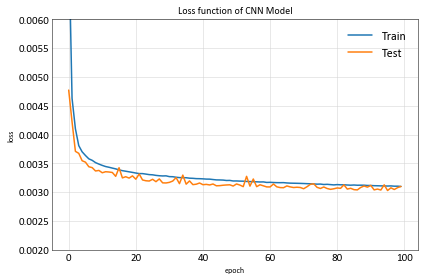

4-conv-4x4-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 26s 295us/sample - loss: 0.0090 - accuracy: 0.0908 - val_loss: 0.0046 - val_accuracy: 0.0937
Epoch 2/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0046 - accuracy: 0.0884 - val_loss: 0.0041 - val_accuracy: 0.0928
Epoch 3/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0040 - accuracy: 0.0902 - val_loss: 0.0037 - val_accuracy: 0.0920
Epoch 4/100
87120/87120 [==============================] - 25s 292us/sample - loss: 0.0038 - accuracy: 0.0955 - val_loss: 0.0036 - val_accuracy: 0.0954
Epoch 5/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0037 - accuracy: 0.1001 - val_loss: 0.0036 - val_accuracy: 0.0922
Epoch 6/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0036 - accuracy: 0.0942 - val_loss: 0.0034 - val_accuracy: 0.0898
Epoc

87120/87120 [==============================] - 25s 288us/sample - loss: 0.0032 - accuracy: 0.0963 - val_loss: 0.0031 - val_accuracy: 0.0876
Epoch 55/100
87120/87120 [==============================] - 25s 288us/sample - loss: 0.0032 - accuracy: 0.0943 - val_loss: 0.0031 - val_accuracy: 0.0877
Epoch 56/100
87120/87120 [==============================] - 25s 288us/sample - loss: 0.0032 - accuracy: 0.0933 - val_loss: 0.0032 - val_accuracy: 0.0898
Epoch 57/100
87120/87120 [==============================] - 25s 290us/sample - loss: 0.0032 - accuracy: 0.0930 - val_loss: 0.0031 - val_accuracy: 0.0842
Epoch 58/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - accuracy: 0.0913 - val_loss: 0.0031 - val_accuracy: 0.0837
Epoch 59/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - accuracy: 0.0906 - val_loss: 0.0031 - val_accuracy: 0.0882
Epoch 60/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0032 - a

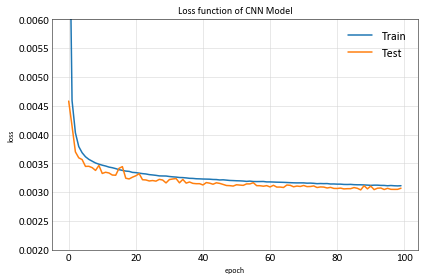

6-conv-4x4-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 31s 351us/sample - loss: 0.0101 - accuracy: 0.1295 - val_loss: 0.0045 - val_accuracy: 0.1404
Epoch 2/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0046 - accuracy: 0.1412 - val_loss: 0.0037 - val_accuracy: 0.1826
Epoch 3/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0039 - accuracy: 0.1567 - val_loss: 0.0034 - val_accuracy: 0.2191
Epoch 4/100
87120/87120 [==============================] - 33s 382us/sample - loss: 0.0037 - accuracy: 0.1596 - val_loss: 0.0034 - val_accuracy: 0.2198
Epoch 5/100
87120/87120 [==============================] - 34s 391us/sample - loss: 0.0036 - accuracy: 0.1752 - val_loss: 0.0033 - val_accuracy: 0.2235
Epoch 6/100
87120/87120 [==============================] - 32s 369us/sample - loss: 0.0035 - accuracy: 0.1907 - val_loss: 0.0035 - val_accuracy: 0.2227
Epoch

87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - accuracy: 0.2794 - val_loss: 0.0026 - val_accuracy: 0.2964
Epoch 55/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2846 - val_loss: 0.0026 - val_accuracy: 0.3069
Epoch 56/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2831 - val_loss: 0.0027 - val_accuracy: 0.3022
Epoch 57/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - accuracy: 0.2840 - val_loss: 0.0026 - val_accuracy: 0.3103
Epoch 58/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2822 - val_loss: 0.0026 - val_accuracy: 0.3069
Epoch 59/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - accuracy: 0.2843 - val_loss: 0.0026 - val_accuracy: 0.3061
Epoch 60/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - a

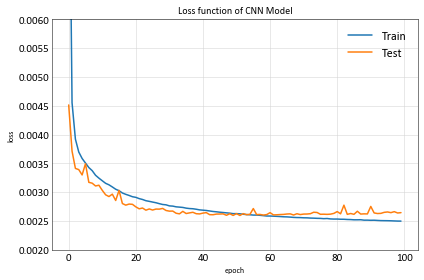

6-conv-4x4-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 30s 347us/sample - loss: 0.0115 - accuracy: 0.0872 - val_loss: 0.0048 - val_accuracy: 0.0899
Epoch 2/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0051 - accuracy: 0.0888 - val_loss: 0.0045 - val_accuracy: 0.0918
Epoch 3/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0044 - accuracy: 0.0871 - val_loss: 0.0037 - val_accuracy: 0.0856
Epoch 4/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0040 - accuracy: 0.0826 - val_loss: 0.0036 - val_accuracy: 0.0815
Epoch 5/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0038 - accuracy: 0.0857 - val_loss: 0.0037 - val_accuracy: 0.0842
Epoch 6/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0037 - accuracy: 0.0979 - val_loss: 0.0034 - val_accuracy: 0.1354
Epoc

87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2569 - val_loss: 0.0027 - val_accuracy: 0.2615
Epoch 55/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - accuracy: 0.2546 - val_loss: 0.0027 - val_accuracy: 0.2549
Epoch 56/100
87120/87120 [==============================] - 29s 336us/sample - loss: 0.0026 - accuracy: 0.2532 - val_loss: 0.0026 - val_accuracy: 0.2697
Epoch 57/100
87120/87120 [==============================] - 29s 337us/sample - loss: 0.0026 - accuracy: 0.2543 - val_loss: 0.0026 - val_accuracy: 0.2627
Epoch 58/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2544 - val_loss: 0.0026 - val_accuracy: 0.2670
Epoch 59/100
87120/87120 [==============================] - 29s 337us/sample - loss: 0.0026 - accuracy: 0.2540 - val_loss: 0.0026 - val_accuracy: 0.2712
Epoch 60/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - a

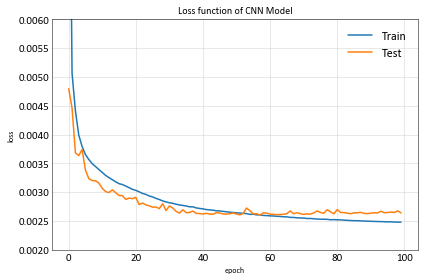

6-conv-4x4-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 30s 345us/sample - loss: 0.0098 - accuracy: 0.0911 - val_loss: 0.0049 - val_accuracy: 0.0775
Epoch 2/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0048 - accuracy: 0.0895 - val_loss: 0.0040 - val_accuracy: 0.0790
Epoch 3/100
87120/87120 [==============================] - 29s 339us/sample - loss: 0.0041 - accuracy: 0.0835 - val_loss: 0.0035 - val_accuracy: 0.0817
Epoch 4/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0038 - accuracy: 0.0806 - val_loss: 0.0034 - val_accuracy: 0.0734
Epoch 5/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0036 - accuracy: 0.0855 - val_loss: 0.0034 - val_accuracy: 0.0675
Epoch 6/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0035 - accuracy: 0.0966 - val_loss: 0.0037 - val_accuracy: 0.0867
Epoc

87120/87120 [==============================] - 29s 339us/sample - loss: 0.0026 - accuracy: 0.2871 - val_loss: 0.0028 - val_accuracy: 0.3073
Epoch 55/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0026 - accuracy: 0.2889 - val_loss: 0.0027 - val_accuracy: 0.3029
Epoch 56/100
87120/87120 [==============================] - 29s 338us/sample - loss: 0.0026 - accuracy: 0.2879 - val_loss: 0.0026 - val_accuracy: 0.3121
Epoch 57/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2894 - val_loss: 0.0026 - val_accuracy: 0.3032
Epoch 58/100
87120/87120 [==============================] - 29s 337us/sample - loss: 0.0026 - accuracy: 0.2896 - val_loss: 0.0026 - val_accuracy: 0.3107
Epoch 59/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - accuracy: 0.2932 - val_loss: 0.0026 - val_accuracy: 0.3092
Epoch 60/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0026 - a

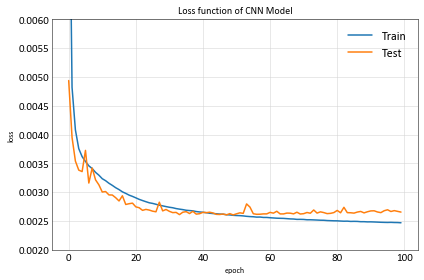

2-conv-5x5-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 240us/sample - loss: 0.0071 - accuracy: 0.1152 - val_loss: 0.0054 - val_accuracy: 0.1008
Epoch 2/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0051 - accuracy: 0.0984 - val_loss: 0.0047 - val_accuracy: 0.0959
Epoch 3/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0046 - accuracy: 0.0926 - val_loss: 0.0044 - val_accuracy: 0.0958
Epoch 4/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0044 - accuracy: 0.0929 - val_loss: 0.0043 - val_accuracy: 0.0961
Epoch 5/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0042 - accuracy: 0.0950 - val_loss: 0.0041 - val_accuracy: 0.0940
Epoch 6/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0041 - accuracy: 0.0936 - val_loss: 0.0040 - val_accuracy: 0.0945
Epoch

87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1037 - val_loss: 0.0037 - val_accuracy: 0.1008
Epoch 55/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1032 - val_loss: 0.0037 - val_accuracy: 0.1013
Epoch 56/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1033 - val_loss: 0.0037 - val_accuracy: 0.0990
Epoch 57/100
87120/87120 [==============================] - 20s 231us/sample - loss: 0.0037 - accuracy: 0.1036 - val_loss: 0.0037 - val_accuracy: 0.1036
Epoch 58/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0037 - accuracy: 0.1037 - val_loss: 0.0037 - val_accuracy: 0.0998
Epoch 59/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1034 - val_loss: 0.0038 - val_accuracy: 0.1031
Epoch 60/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0037 - a

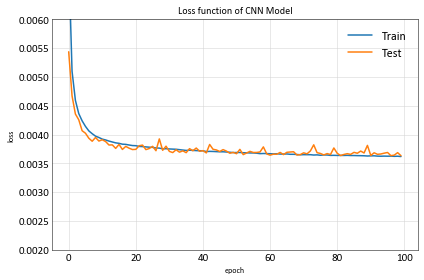

2-conv-5x5-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 241us/sample - loss: 0.0070 - accuracy: 0.0971 - val_loss: 0.0054 - val_accuracy: 0.0936
Epoch 2/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0052 - accuracy: 0.0921 - val_loss: 0.0047 - val_accuracy: 0.0950
Epoch 3/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0046 - accuracy: 0.0954 - val_loss: 0.0045 - val_accuracy: 0.0968
Epoch 4/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0044 - accuracy: 0.0967 - val_loss: 0.0042 - val_accuracy: 0.0952
Epoch 5/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0043 - accuracy: 0.0962 - val_loss: 0.0040 - val_accuracy: 0.0957
Epoch 6/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0042 - accuracy: 0.0967 - val_loss: 0.0039 - val_accuracy: 0.0978
Epoc

87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1066 - val_loss: 0.0037 - val_accuracy: 0.1099
Epoch 55/100
87120/87120 [==============================] - 21s 236us/sample - loss: 0.0037 - accuracy: 0.1073 - val_loss: 0.0038 - val_accuracy: 0.1077
Epoch 56/100
87120/87120 [==============================] - 21s 237us/sample - loss: 0.0037 - accuracy: 0.1069 - val_loss: 0.0037 - val_accuracy: 0.1067
Epoch 57/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0037 - accuracy: 0.1071 - val_loss: 0.0037 - val_accuracy: 0.1071
Epoch 58/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - accuracy: 0.1046 - val_loss: 0.0037 - val_accuracy: 0.1073
Epoch 59/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0037 - accuracy: 0.1054 - val_loss: 0.0037 - val_accuracy: 0.1035
Epoch 60/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0037 - a

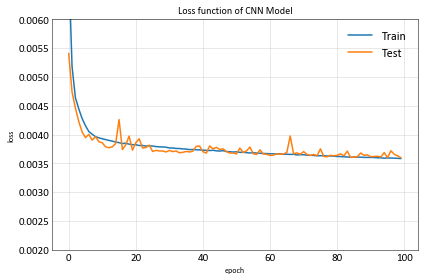

2-conv-5x5-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 21s 240us/sample - loss: 0.0082 - accuracy: 0.0919 - val_loss: 0.0051 - val_accuracy: 0.0946
Epoch 2/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0050 - accuracy: 0.0966 - val_loss: 0.0046 - val_accuracy: 0.0955
Epoch 3/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0046 - accuracy: 0.0978 - val_loss: 0.0045 - val_accuracy: 0.0951
Epoch 4/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0044 - accuracy: 0.0987 - val_loss: 0.0042 - val_accuracy: 0.0939
Epoch 5/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0043 - accuracy: 0.0948 - val_loss: 0.0041 - val_accuracy: 0.0937
Epoch 6/100
87120/87120 [==============================] - 20s 235us/sample - loss: 0.0042 - accuracy: 0.0951 - val_loss: 0.0040 - val_accuracy: 0.0944
Epoc

87120/87120 [==============================] - 20s 233us/sample - loss: 0.0036 - accuracy: 0.1066 - val_loss: 0.0037 - val_accuracy: 0.1048
Epoch 55/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0036 - accuracy: 0.1075 - val_loss: 0.0037 - val_accuracy: 0.1046
Epoch 56/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0036 - accuracy: 0.1071 - val_loss: 0.0036 - val_accuracy: 0.1053
Epoch 57/100
87120/87120 [==============================] - 20s 232us/sample - loss: 0.0036 - accuracy: 0.1072 - val_loss: 0.0036 - val_accuracy: 0.1042
Epoch 58/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0036 - accuracy: 0.1063 - val_loss: 0.0037 - val_accuracy: 0.1045
Epoch 59/100
87120/87120 [==============================] - 20s 234us/sample - loss: 0.0036 - accuracy: 0.1063 - val_loss: 0.0036 - val_accuracy: 0.1059
Epoch 60/100
87120/87120 [==============================] - 20s 233us/sample - loss: 0.0036 - a

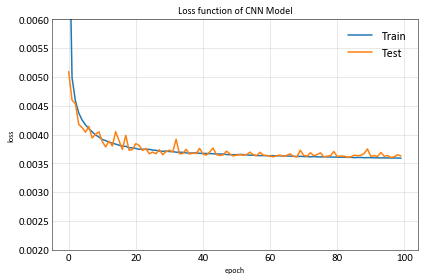

4-conv-5x5-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 291us/sample - loss: 0.0083 - accuracy: 0.0989 - val_loss: 0.0052 - val_accuracy: 0.0997
Epoch 2/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0044 - accuracy: 0.0949 - val_loss: 0.0039 - val_accuracy: 0.0927
Epoch 3/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0039 - accuracy: 0.0899 - val_loss: 0.0036 - val_accuracy: 0.0883
Epoch 4/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0037 - accuracy: 0.0889 - val_loss: 0.0035 - val_accuracy: 0.0834
Epoch 5/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0036 - accuracy: 0.0916 - val_loss: 0.0035 - val_accuracy: 0.0882
Epoch 6/100
87120/87120 [==============================] - 25s 282us/sample - loss: 0.0036 - accuracy: 0.0971 - val_loss: 0.0034 - val_accuracy: 0.0949
Epoch

87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2211 - val_loss: 0.0030 - val_accuracy: 0.2232
Epoch 55/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2252 - val_loss: 0.0031 - val_accuracy: 0.2291
Epoch 56/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2279 - val_loss: 0.0030 - val_accuracy: 0.2435
Epoch 57/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2310 - val_loss: 0.0030 - val_accuracy: 0.2532
Epoch 58/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2336 - val_loss: 0.0030 - val_accuracy: 0.2326
Epoch 59/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0031 - accuracy: 0.2335 - val_loss: 0.0030 - val_accuracy: 0.2111
Epoch 60/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0031 - a

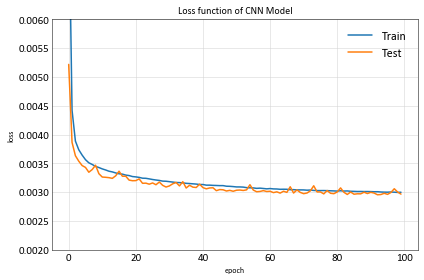

4-conv-5x5-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 291us/sample - loss: 0.0076 - accuracy: 0.0991 - val_loss: 0.0046 - val_accuracy: 0.1031
Epoch 2/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0042 - accuracy: 0.1000 - val_loss: 0.0037 - val_accuracy: 0.0988
Epoch 3/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0038 - accuracy: 0.0997 - val_loss: 0.0036 - val_accuracy: 0.1013
Epoch 4/100
87120/87120 [==============================] - 25s 282us/sample - loss: 0.0037 - accuracy: 0.1078 - val_loss: 0.0035 - val_accuracy: 0.1219
Epoch 5/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0036 - accuracy: 0.1227 - val_loss: 0.0035 - val_accuracy: 0.1197
Epoch 6/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0035 - accuracy: 0.1226 - val_loss: 0.0034 - val_accuracy: 0.1160
Epoc

87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2248 - val_loss: 0.0030 - val_accuracy: 0.2077
Epoch 55/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2221 - val_loss: 0.0030 - val_accuracy: 0.2236
Epoch 56/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2248 - val_loss: 0.0031 - val_accuracy: 0.2363
Epoch 57/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2255 - val_loss: 0.0030 - val_accuracy: 0.2312
Epoch 58/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0031 - accuracy: 0.2253 - val_loss: 0.0030 - val_accuracy: 0.2101
Epoch 59/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2247 - val_loss: 0.0030 - val_accuracy: 0.2318
Epoch 60/100
87120/87120 [==============================] - 25s 287us/sample - loss: 0.0031 - a

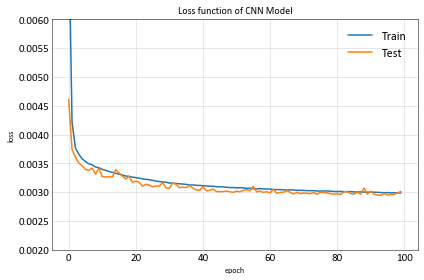

4-conv-5x5-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 25s 289us/sample - loss: 0.0077 - accuracy: 0.0920 - val_loss: 0.0045 - val_accuracy: 0.0891
Epoch 2/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0044 - accuracy: 0.0882 - val_loss: 0.0038 - val_accuracy: 0.0813
Epoch 3/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0038 - accuracy: 0.0844 - val_loss: 0.0036 - val_accuracy: 0.0838
Epoch 4/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0037 - accuracy: 0.0818 - val_loss: 0.0035 - val_accuracy: 0.0830
Epoch 5/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0036 - accuracy: 0.0835 - val_loss: 0.0035 - val_accuracy: 0.0763
Epoch 6/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0035 - accuracy: 0.0819 - val_loss: 0.0035 - val_accuracy: 0.0788
Epoc

87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - accuracy: 0.2174 - val_loss: 0.0030 - val_accuracy: 0.2194
Epoch 55/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2208 - val_loss: 0.0031 - val_accuracy: 0.2187
Epoch 56/100
87120/87120 [==============================] - 25s 286us/sample - loss: 0.0031 - accuracy: 0.2242 - val_loss: 0.0030 - val_accuracy: 0.2365
Epoch 57/100
87120/87120 [==============================] - 25s 283us/sample - loss: 0.0031 - accuracy: 0.2253 - val_loss: 0.0030 - val_accuracy: 0.2452
Epoch 58/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2244 - val_loss: 0.0030 - val_accuracy: 0.2114
Epoch 59/100
87120/87120 [==============================] - 25s 285us/sample - loss: 0.0031 - accuracy: 0.2240 - val_loss: 0.0030 - val_accuracy: 0.2363
Epoch 60/100
87120/87120 [==============================] - 25s 284us/sample - loss: 0.0031 - a

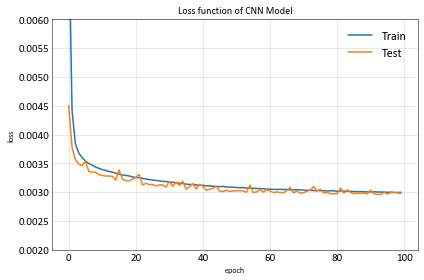

6-conv-5x5-kernel_size-0-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 31s 353us/sample - loss: 0.0097 - accuracy: 0.0847 - val_loss: 0.0046 - val_accuracy: 0.0818
Epoch 2/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0045 - accuracy: 0.0864 - val_loss: 0.0036 - val_accuracy: 0.0822
Epoch 3/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0039 - accuracy: 0.0878 - val_loss: 0.0037 - val_accuracy: 0.0826
Epoch 4/100
87120/87120 [==============================] - 30s 343us/sample - loss: 0.0037 - accuracy: 0.0886 - val_loss: 0.0033 - val_accuracy: 0.0815
Epoch 5/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0035 - accuracy: 0.0939 - val_loss: 0.0033 - val_accuracy: 0.0712
Epoch 6/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0034 - accuracy: 0.1116 - val_loss: 0.0032 - val_accuracy: 0.1134
Epoch

87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2758 - val_loss: 0.0027 - val_accuracy: 0.2921
Epoch 55/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2743 - val_loss: 0.0027 - val_accuracy: 0.2768
Epoch 56/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2752 - val_loss: 0.0027 - val_accuracy: 0.2966
Epoch 57/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2748 - val_loss: 0.0026 - val_accuracy: 0.3008
Epoch 58/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2746 - val_loss: 0.0026 - val_accuracy: 0.2798
Epoch 59/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2730 - val_loss: 0.0027 - val_accuracy: 0.3052
Epoch 60/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - a

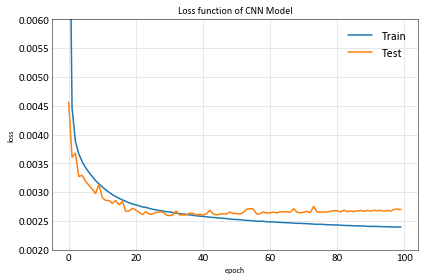

6-conv-5x5-kernel_size-25-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 31s 350us/sample - loss: 0.0130 - accuracy: 0.1056 - val_loss: 0.0046 - val_accuracy: 0.1030
Epoch 2/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0047 - accuracy: 0.1305 - val_loss: 0.0043 - val_accuracy: 0.1632
Epoch 3/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0040 - accuracy: 0.1355 - val_loss: 0.0035 - val_accuracy: 0.1877
Epoch 4/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0038 - accuracy: 0.1489 - val_loss: 0.0034 - val_accuracy: 0.1788
Epoch 5/100
87120/87120 [==============================] - 30s 343us/sample - loss: 0.0036 - accuracy: 0.1418 - val_loss: 0.0034 - val_accuracy: 0.1371
Epoch 6/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0035 - accuracy: 0.1366 - val_loss: 0.0032 - val_accuracy: 0.1641
Epoc

87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - accuracy: 0.2641 - val_loss: 0.0027 - val_accuracy: 0.2791
Epoch 55/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - accuracy: 0.2634 - val_loss: 0.0027 - val_accuracy: 0.2714
Epoch 56/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - accuracy: 0.2653 - val_loss: 0.0026 - val_accuracy: 0.2604
Epoch 57/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2657 - val_loss: 0.0026 - val_accuracy: 0.2758
Epoch 58/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2656 - val_loss: 0.0026 - val_accuracy: 0.2691
Epoch 59/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2651 - val_loss: 0.0026 - val_accuracy: 0.2809
Epoch 60/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - a

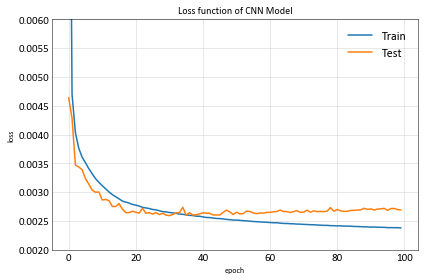

6-conv-5x5-kernel_size-50-Dropout
Train on 87120 samples, validate on 21780 samples
Epoch 1/100
87120/87120 [==============================] - 30s 349us/sample - loss: 0.0095 - accuracy: 0.1045 - val_loss: 0.0053 - val_accuracy: 0.1045
Epoch 2/100
87120/87120 [==============================] - 30s 344us/sample - loss: 0.0043 - accuracy: 0.1132 - val_loss: 0.0036 - val_accuracy: 0.1031
Epoch 3/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0039 - accuracy: 0.1100 - val_loss: 0.0034 - val_accuracy: 0.0910
Epoch 4/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0037 - accuracy: 0.1004 - val_loss: 0.0036 - val_accuracy: 0.0798
Epoch 5/100
87120/87120 [==============================] - 30s 343us/sample - loss: 0.0035 - accuracy: 0.1211 - val_loss: 0.0033 - val_accuracy: 0.1534
Epoch 6/100
87120/87120 [==============================] - 30s 339us/sample - loss: 0.0034 - accuracy: 0.1545 - val_loss: 0.0032 - val_accuracy: 0.1983
Epoc

87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2675 - val_loss: 0.0027 - val_accuracy: 0.2754
Epoch 55/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2662 - val_loss: 0.0026 - val_accuracy: 0.2855
Epoch 56/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2690 - val_loss: 0.0026 - val_accuracy: 0.2748
Epoch 57/100
87120/87120 [==============================] - 30s 341us/sample - loss: 0.0025 - accuracy: 0.2661 - val_loss: 0.0026 - val_accuracy: 0.2705
Epoch 58/100
87120/87120 [==============================] - 30s 342us/sample - loss: 0.0025 - accuracy: 0.2672 - val_loss: 0.0026 - val_accuracy: 0.2778
Epoch 59/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - accuracy: 0.2661 - val_loss: 0.0026 - val_accuracy: 0.2666
Epoch 60/100
87120/87120 [==============================] - 30s 340us/sample - loss: 0.0025 - a

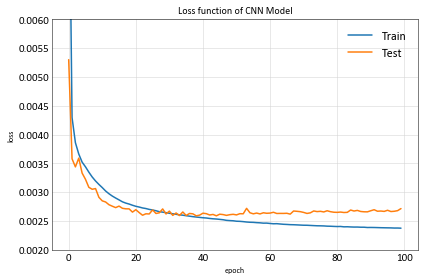

In [23]:
for kernel_size in kernel_sizes:
    for conv_layer in conv_layers:
        for Dropout in Dropouts:
            NAME = "{}-conv-{}x{}-kernel_size-{}-Dropout".format(conv_layer, kernel_size,kernel_size, int(Dropout*100))
            print(NAME)
            
            model = tf.keras.Sequential()
    
            model.add(layers.Conv2D(8, kernel_size=(kernel_size,kernel_size), strides=1, input_shape=[100,100,1], padding="same"))
            model.add(layers.ReLU())
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
            
            layer_size = 16
            for l in range(conv_layer-2):
                model.add(layers.Conv2D(layer_size, kernel_size=(kernel_size,kernel_size), strides=(1,1), padding = "same"))
                model.add(layers.ReLU())
                model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
                layer_size = layer_size*2
    
            model.add(layers.Conv2D(8, kernel_size=(3,3), strides=(1,1), padding = "same"))
            model.add(layers.ReLU())
            
            model.add(layers.Dropout(0.25))
            model.add(layers.Flatten())
            
            
            model.add(layers.Dense(13,activation = 'sigmoid'))
    

            optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
            model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=optimizer)

            
            history = model.fit(X2_train, y2_train,epochs=100, verbose=1,validation_data=(X2_test, y2_test))

            acc = history.history['accuracy']
            val_acc = history.history['val_accuracy']
            loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochs = range(len(acc))

            
            datafl = np.array([epochs, acc,val_acc,loss,val_loss]).T
            header='\n'.join(["Output", "5","epochs","acc","val_acc","loss","val_loss"])
            np.savetxt('Saved_Results/'+str(conv_layer)+'conv_'+str(kernel_size)+'x'+str(kernel_size)+'kernel_size_'+str(int(Dropout*100))+'Dropout.out', datafl, delimiter=" ",comments='',header=header)

            
            plt.subplot(1,1,1)
            plt.plot(loss)
            plt.plot(val_loss)
            plt.title('Loss function of CNN Model')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['Train', 'Test'], loc='upper right',fontsize=12)
            plt.ylim(0.002,0.006)
            plt.grid()
            plt.tight_layout()
            plt.savefig('Saved_Images/'+str(conv_layer)+'conv_'+str(kernel_size)+'x'+str(kernel_size)+'kernel_size_'+str(int(Dropout*100))+'Dropout.png', dpi=300, bbox_inches='tight')

            plt.show()

            model.save('Saved_models/Model_'+str(conv_layer)+'conv_'+str(kernel_size)+'x'+str(kernel_size)+'kernel_size_'+str(int(Dropout*100))+'Dropout.h5')
            
            

In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
CNN_Major = load_model('Sensitivity Analysis Plots/Exp Variogram/Saved_models/Model_6conv_3x3kernel_size_25Dropout.h5')
# summarize model.
CNN_Major.summary()